# Programming for Data Analysis - Project 2

**Ciaran Moran**

***
(Note. References can be found at the end of the notebook)

**Standard imports**


[[1]](#References)
Receiving some user warning messages, so I found this code to prevent them from being displayed



In [1]:
import warnings
warnings.simplefilter("ignore", category=Warning)

In [2]:

# Imports
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import numpy as np
#import math
import os
import datetime
from datetime import date
from datetime import timedelta
from datetime import datetime,timedelta


Date calc from decimal

[[2]](#References) Stackoverflow

In [3]:
def calc_date(days):
    start = date(1950,1,1)
    searchingDate  = start - timedelta(days=days)
    timestampSearchingDate = (int(searchingDate.timestamp()))
    print('In calc_date, days:' , days, ' timestampSearchingDate:', timestampSearchingDate)

    return timestampSearchingDate

### Convert kelvin to celsius
[[3]](#References) lindevs.com


In [4]:
def kelvinToCelsius(kelvin):
    return kelvin - 273.15

In [5]:
def make_numeric(data):
    data[['hpi']] = data[['hpi']].apply(pd.to_numeric)

### function to strip white spaces from
[[4]](#References)
 Stackoverflow.com


In [6]:
# this function took 10 mins 51 seconds to run!
def strip(text):
    try:
        return text.strip()
    except AttributeError:
        return text

Below function from 
[[5]](#References) Towards Data Science,
and modified by me for this project.

In [7]:
def read_csv_strip(data, names, skiprows, encoding, skip_blank_lines, keep_default_na, na_filter, delim_whitespace, date_columns=[]):

    #skiprows=6, encoding='unicode_escape',  skip_blank_lines=True, 
    # keep_default_na=True,na_filter=True)

    # check if the names list has values or empty
    if len(names):
        df = pd.read_csv(data, names=names, skiprows=skiprows, encoding=encoding, \
                     skip_blank_lines=skip_blank_lines, keep_default_na=keep_default_na, \
                        na_filter=na_filter,quotechar='"', delim_whitespace=delim_whitespace, parse_dates=date_columns)
    else :
            df = pd.read_csv(data, skiprows=skiprows, encoding=encoding, \
                     skip_blank_lines=skip_blank_lines, keep_default_na=keep_default_na, \
                        na_filter=na_filter,quotechar='"', parse_dates=date_columns)

    print('Before data clean')
    print(data)
    print(df.dtypes)
    
    df = df.replace({"":np.nan}) # if there remained only empty string "", change to Nan

    # for each column
    for col in df.columns:
        # check if the columns contains string data
        #fi so strip whitespace
        if pd.api.types.is_string_dtype(df[col]):
            df[col] = df[col].str.strip()
            #next we'll attempt to convert to numeric
            #is not successful we'll continue as a string.
            try:
                #https://stackoverflow.com/questions/38553946/pandas-read-csv-convert-object-to-float
                df[col] = df[col].apply(pd.to_numeric)
            except Exception:
                print ('>>>>>>>>>ERROR Converting :***',df[col], '*** from ', data,' <<<<<<<<<<<<<<<')
                pass
            #except AttributeError:
            #    # process as a string
            #    df[col] = df[col].str.strip()
    df = df.replace({"":np.nan}) # if there remained only empty string "", change to Nan

    print('AFTER data clean')
    print(data)
    print(df.dtypes)


    return df

## Open the .csv files
#### We can skip the first X rows in the csv as they are not pure data columns
#### Initially received the error "UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfc in position 33: invalid start byte"

Looking online I tried various suggestions from 
[[6]](#References) Stackoverflow

The working solution appears to be encoding='unicode_escape'


The next issue was rows with all Nan values, which may cause issues later on.
For this I tried keep_default_na=True,na_filter=True and also skip_blank_lines=True from 

[[7]](#References) Stackoverflow


# 41586_2008_BFnature06949_MOESM31_ESM.csv
***
## Data standardisation - splicing, cleaning and processing.
###
Note: I don't know if this was part of the project.
However I took each part of the main spreadsheet and used python to extract the data from the various cells for each particulat station.

This proved to be very pain-staking and I spent many days over Crhistmas on this aspect.
It wasn't until afterwards that I realised there was a composite sheet with all the data already merged.
In fact I did this for 13 of the locations, and it was then that I notuced the composite data sheet.

I just wanted to mention this as I spent considerable time on this aspect.
However the upshot of this is that I (personally) learned how to splice, cleanse and process such data.
Which in the real world should come in very useful.

##### File: 41586_2008_BFnature06949_MOESM31_ESM.csv

Here I attempt to standardise the data.

The initial issue is that we have 2 sets of data side by side.

So I extract the data for University of Berlin into a seperate dataframe.

Then I extract the data for LGGE in Grenoble into its own dataframe.

I then rename the column titles to match those of University of Berlin.

Then the dataframes are concatinated together into one dataframe.

The result is a .csv with the data listed in a more consistant order.



Reference for below code

[[8]](#References) Stackoverflow 
Read csv file by column number in pandas python


[[9]](#References) Codecademy.com 
Can we add a new column at a specific position in a pandas dataframe.

[[10]](#References) Stackoverflow 
Read csv file by column number in pandas python

[[11]](#References) usepandas.com 
Append csv files


In [8]:
# Here we read in 41586_2008_BFnature06949_MOESM31_ESM.csv
#
df=read_csv_strip('data/41586_2008_BFnature06949_MOESM31_ESM.csv', [], 6, 'unicode_escape', \
               True, True, True, False, date_columns=[])

#df = pd.read_csv('data/41586_2008_BFnature06949_MOESM31_ESM.csv', \
#                  skiprows=6, encoding='unicode_escape',  skip_blank_lines=True, \
#                   keep_default_na=True,na_filter=True)

####################
# University of Bern
####################
#[8] - https://stackoverflow.com/questions/61553063/read-csv-file-by-column-number-in-pandas-python

moesm31_1 = df.iloc[0:247, 0:4] # This will copy columns 0 to 3, for rows 0-246 
#Now add in some constants to standardise the data frame
moesm31_1['station'] = 'moesm31'
moesm31_1['uni'] = 'University of Bern'

# Insert new column in position
moesm31_1.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
moesm31_1["Gasage (AICC2012, yr BP)"] = np.nan
 
#print('--------------------------')
#print('moesm31_1 - head and tail')
#print('--------------------------')
#print(moesm31_1.head())
#print(moesm31_1.tail())

save_filename = 'data/generated/moesm31_1.csv'
if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
moesm31_1.to_csv(save_filename, index=False)

#print(moesm31_1.tail())

###################
# LGGE in Grenoble
###################
moesm31_2 = df.iloc[0:47, 4:7] # This will give you all rows for columns 4 to 6

#print(moesm31_2.head())
# [9]
#https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
moesm31_2.rename(columns={'Depth (m).1': 'Depth (m)', 'EDC3_gas_a (yr).1': 'EDC3_gas_a (yr)', \
                   'CO2 (ppmv).1': 'CO2 (ppmv)' }, inplace=True)
#print(moesm31_2.head())

#Now add in some constants to standardise the data frame
moesm31_2['sigma (ppmv)'] = '' # this data isn't present
moesm31_2['station'] = 'moesm31'
moesm31_2['uni'] = 'LGGE in Grenoble'

# Insert new column in position
# [10] Codecademy.com Can we add a new column at a specific position in a pandas dataframe.
moesm31_2.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
moesm31_2["Gasage (AICC2012, yr BP)"] = np.nan
	
 
print('--------------------------')
print('moesm31_2 - head and tail')
print('--------------------------')
#print(moesm31_2.head())
#print(moesm31_2.tail())

save_filename = 'data/generated/moesm31_2.csv'
if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
moesm31_2.to_csv(save_filename, index=False)




Before data clean
data/41586_2008_BFnature06949_MOESM31_ESM.csv
Depth (m)            float64
EDC3_gas_a (yr)      float64
CO2 (ppmv)           float64
sigma (ppmv)         float64
Depth (m).1          float64
EDC3_gas_a (yr).1    float64
CO2 (ppmv).1         float64
Unnamed: 7           float64
dtype: object
AFTER data clean
data/41586_2008_BFnature06949_MOESM31_ESM.csv
Depth (m)            float64
EDC3_gas_a (yr)      float64
CO2 (ppmv)           float64
sigma (ppmv)         float64
Depth (m).1          float64
EDC3_gas_a (yr).1    float64
CO2 (ppmv).1         float64
Unnamed: 7           float64
dtype: object
--------------------------
moesm31_2 - head and tail
--------------------------


### Now we concatinate both files into one standard format

References for below code.

[[11]](#References) usepandas.com 

https://www.usepandas.com/csv/append-csv-files

In [9]:
# We can append (concat) both of the new .csv files  
# [11] Ref: usepandas.com
moesm31_combined=pd.concat([moesm31_1, moesm31_2])
# Now add in the source file name, may come in handy later on
moesm31_combined['source file'] = '41586_2008_BFnature06949_MOESM31_ESM.csv'

# write out to csv, may not be necessary, but handy for checking data
save_filename = 'data/generated/moesm31_combined.csv'
if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
moesm31_combined.to_csv(save_filename, index=False)

#print(moesm31_combined.head)
#print(moesm31_combined.tail)


### File data/grl52461-sup-0003-supplementary.csv

#### Now we process the larger of the two files.
#### I can re-use some of the code I created for the smaller file.
#### Also the lessons learned and knowledge garnered for the smaller file will be invaluable.

***
##  Read in supplementary file grl52461-sup-0003-supplementary.csv


In [10]:
#
# Here we read in grl52461-sup-0003-supplementary.csv
#
df=read_csv_strip('data/grl52461-sup-0003-supplementary.csv', [], 6, 'unicode_escape', \
               True, True, True, False, date_columns=[])





Before data clean
data/grl52461-sup-0003-supplementary.csv
Depth (m)                                        float64
Gasage (EDC3, yr BP)                             float64
Gasage (AICC2012, yr BP)                         float64
CO2 (ppmv)                                       float64
sigma mean CO2 (ppmv)                            float64
                                                  ...   
analytical sigma mean CO2 (ppmv)                 float64
Correcting Factor (ppmv)                         float64
lower bound (2 sigma) of correction F. (ppmv)    float64
upper bound (2 sigma) of correction F. (ppmv)    float64
Unnamed: 108                                     float64
Length: 109, dtype: object
AFTER data clean
data/grl52461-sup-0003-supplementary.csv
Depth (m)                                        float64
Gasage (EDC3, yr BP)                             float64
Gasage (AICC2012, yr BP)                         float64
CO2 (ppmv)                                       float64
s

***
##  supplementary.csv - Dome C - University of Bern

Reference for below code


Ref [[8]](#References)

https://stackoverflow.com/questions/61553063/read-csv-file-by-column-number-in-pandas-python

In [11]:
#########################################
# supplementary.csv - University of Bern
#########################################
row_offset = -7

# Ref [8]
# https://stackoverflow.com/questions/61553063/read-csv-file-by-column-number-in-pandas-python
#
print('Processing file grl52461-sup-0003-supplementary.csv...')

station = 'Dome C (0-22 kyr BP)P'
uni = 'University of Bern'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_1 = df.iloc[0:183, 0:5].copy() # This will copy columns 0 to 3, for rows 0-246 
#Now add in some constants to standardise the data frame
suppl_1['station'] = station
suppl_1['uni'] = uni

suppl_1.rename(columns={'Gasage (EDC3, yr BP)': 'EDC3_gas_a (yr)', \
                        'sigma mean CO2 (ppmv)': 'sigma (ppmv)', \
                   'CO2 (ppmv).1': 'CO2 (ppmv)' }, inplace=True)


if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_1.to_csv(save_filename, index=False)

#print(suppl_1.head())
#print(suppl_1.tail())



Processing file grl52461-sup-0003-supplementary.csv...
save_filename : data/generated/suppl_Dome C (0-22 kyr BP)P_University of Bern.csv


***
## supplementary.csv - Vostok - LGGE Grenoble

In [12]:

#########################################
# supplementary.csv  - Vostok - LGGE Grenoble
#########################################
#
#
station = 'Vostok (0-440 kyr BP)'
uni = 'LGGE Grenoble'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

print('Processing file grl52461-sup-0003-supplementary.csv...')
suppl_2 = df.iloc[0:372, 5:9].copy() 

#Depth (m).1	Gasage (EDC3, yr BP).1	Gasage (AICC2012, yr BP).1	CO2 (ppmv).1
suppl_2.rename(columns={'Depth (m).1': 'Depth (m)', 'Gasage (EDC3, yr BP).1': 'Gasage (EDC3, yr BP)', \
                    'Gasage (AICC2012, yr BP).1': 'Gasage (AICC2012, yr BP)', \
                   'CO2 (ppmv).1': 'CO2 (ppmv)' }, inplace=True)


#Now add in some constants to standardise the data frame
suppl_2['sigma mean CO2 (ppmv)'] = '0' # add in missing column
suppl_2['station'] = station
suppl_2['uni'] = uni

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_2.to_csv(save_filename, index=False)

#print(suppl_2.head())
#print(suppl_2.tail())



save_filename : data/generated/suppl_Vostok (0-440 kyr BP)_LGGE Grenoble.csv
Processing file grl52461-sup-0003-supplementary.csv...


***
## supplementary.csv - Taylor Dome - University of Bern

In [13]:
#########################################
# supplementary.csv - Taylor Dome - University of Bern
#########################################

#
station = 'Taylor Dome (19-63 kyr BP)'
uni = 'University of Bern'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_3 = df.iloc[0:66-row_offset, 9:13].copy() # This will copy columns from the main .csv file

# Depth (m).2	tentatively synchronized on EDC3 gasage (yr)	CO2 (ppmv).2	sigma mean CO2 (ppmv).1	station	uni
suppl_3.rename(columns={'Depth (m).2': 'Depth (m)', \
                        'tentatively synchronized on EDC3 gasage (yr)': 'Gasage (EDC3, yr BP)', \
                                           'CO2 (ppmv).2': 'CO2 (ppmv)' , \
                                            'sigma mean CO2 (ppmv).1': 'sigma mean CO2 (ppmv)' }, \
                                            inplace=True) 


#Now add in some constants to standardise the data frame
suppl_3['station'] = station
suppl_3['uni'] = uni

# Insert new column in position
suppl_3.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
# https://sparkbyexamples.com/pandas/pandas-add-an-empty-column-to-dataframe/#:~:text=To%20add%20an%20empty%20column%20to%20an%20existing%20Pandas%20DataFrame,prefer%2C%20you%20can%20use%20np.
suppl_3["Gasage (AICC2012, yr BP)"] = np.nan	

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_3.to_csv(save_filename, index=False)

#print(suppl_3.head())
#print(suppl_3.tail())



save_filename : data/generated/suppl_Taylor Dome (19-63 kyr BP)_University of Bern.csv


***
## supplementary.csv - Dome C (393-664 kyr BP) - University of Bern

In [14]:
#########################################
# supplementary.csv - Dome C (393-664 kyr BP) - University of Bern
#########################################

row_offset = 7

#
station = 'Dome C (393-664 kyr BP)'
uni = 'University of Bern'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_4 = df.iloc[0:329-row_offset, 13:18].copy() # This will copy columns from the main .csv file

#Depth (m).3	Gasage (EDC3, yr BP).2	Gasage (AICC2012, yr BP)	Gasage (AICC2012, yr BP).2	CO2 (ppmv).3	
# sigma mean CO2 (ppmv).2	station	uni
suppl_4.rename(columns={'Depth (m).3': 'Depth (m)', \
                        'Gasage (AICC2012, yr BP).2': 'Gasage (AICC2012, yr BP)', \
                        'Gasage (EDC3, yr BP).2': 'Gasage (EDC3, yr BP)', \
                                           'CO2 (ppmv).3': 'CO2 (ppmv)' , \
                                            'sigma mean CO2 (ppmv).2': 'sigma mean CO2 (ppmv)' }, \
                                            inplace=True) 


#Now add in some constants to standardise the data frame
suppl_4['station'] = station
suppl_4['uni'] = uni

# Insert new column in position
# https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
#suppl_4.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_4.to_csv(save_filename, index=False)

#print(suppl_4.head())
#print(suppl_4.tail())



save_filename : data/generated/suppl_Dome C (393-664 kyr BP)_University of Bern.csv


In [15]:
#########################################
# supplementary.csv - Dome C (393-664 kyr BP) - LGGE Grenoble
#########################################

row_offset = 7

#
station = 'Dome C (393-664 kyr BP)'
uni = 'LGGE Grenoble'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_5 = df.iloc[0:38-row_offset, 18:23].copy() # This will copy columns from the main .csv file

#REQUIRED HEADINGS
#Depth (m)	Gasage (EDC3, yr BP)	Gasage (AICC2012, yr BP)	CO2 (ppmv)	sigma mean CO2 (ppmv)	station	uni


suppl_5.rename(columns={'Depth (m).4': 'Depth (m)', \
                        'Gasage (EDC3, yr BP).3': 'Gasage (EDC3, yr BP)', \
                        'Gasage (AICC2012, yr BP).3': 'Gasage (AICC2012, yr BP)', \
                        'CO2 (ppmv).4': 'CO2 (ppmv)' , \
                        'sigma mean CO2 (ppmv).3': 'sigma mean CO2 (ppmv)' }, \
                        inplace=True) 


#Now add in some constants to standardise the data frame
suppl_5['station'] = station
suppl_5['uni'] = uni

# Insert new column in position
# https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
#suppl_4.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_5.to_csv(save_filename, index=False)

#print(suppl_5.head())
#print(suppl_5.tail())



save_filename : data/generated/suppl_Dome C (393-664 kyr BP)_LGGE Grenoble.csv


***
## supplementary.csv - Dome C (611-800 kyr BP) - University of Bern

In [16]:
#########################################
# supplementary.csv - Dome C (611-800 kyr BP) - University of Bern
#########################################

row_offset = 7

station = 'Dome C (611-800 kyr BP)'
uni = 'University of Bern'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_5 = df.iloc[0:258-row_offset, 22:27].copy() # This will copy columns from the main .csv file

#Depth (m).3	Gasage (EDC3, yr BP).2	Gasage (AICC2012, yr BP)	Gasage (AICC2012, yr BP).2	CO2 (ppmv).3	
# sigma mean CO2 (ppmv).2	station	uni
suppl_5.rename(columns={'Depth (m).5': 'Depth (m)', \
                        'Gasage (EDC3, yr BP).4': 'Gasage (EDC3, yr BP)', \
                        'Gasage (AICC2012, yr BP).4': 'Gasage (AICC2012, yr BP)', \
                        'sigma mean CO2 (ppmv).3': 'sigma mean CO2 (ppmv)', \
                                           'CO2 (ppmv).5': 'CO2 (ppmv)' }, \
                                            inplace=True) 


#Now add in some constants to standardise the data frame
suppl_5['station'] = station
suppl_5['uni'] = uni

# Insert new column in position
#suppl_4.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_5.to_csv(save_filename, index=False)

#print(suppl_5.head())
#print(suppl_5.tail())



save_filename : data/generated/suppl_Dome C (611-800 kyr BP)_University of Bern.csv


In [17]:
#########################################
# supplementary.csv - Dome C (611-800 kyr BP) - LGGE Grenoble
#########################################

row_offset = 7

station = 'Dome C (611-800 kyr BP)'
uni = 'LGGE Grenoble'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_6 = df.iloc[0:54-row_offset, 27:31].copy() # This will copy columns from the main .csv file


#Depth (m).6	Gasage (EDC3, yr BP).5	Gasage (AICC2012, yr BP).5	CO2 (ppmv).6	

suppl_6.rename(columns={'Depth (m).6': 'Depth (m)', \
                        'Gasage (EDC3, yr BP).5': 'Gasage (EDC3, yr BP)', \
                        'Gasage (AICC2012, yr BP).5': 'Gasage (AICC2012, yr BP)', \
                                           'CO2 (ppmv).6': 'CO2 (ppmv)' }, \
                                            inplace=True) 


#Now add in some constants to standardise the data frame
suppl_6['station'] = station
suppl_6['uni'] = uni

# Insert new column in position
#suppl_4.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_6.to_csv(save_filename, index=False)

#print(suppl_6.head())
#print(suppl_6.tail())



save_filename : data/generated/suppl_Dome C (611-800 kyr BP)_LGGE Grenoble.csv


***
## supplementary.csv - Talos Dome (35-68 kyr BP) - University of Bern

In [18]:
#########################################
# supplementary.csv - Talos Dome (35-68 kyr BP) - University of Bern
#########################################

row_offset = 7

# Ref https://stackoverflow.com/questions/61553063/read-csv-file-by-column-number-in-pandas-python
#
station = 'Talos Dome (35-68 kyr BP)'
uni = 'University of Bern'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_7 = df.iloc[0:123-row_offset, 31:37].copy() # This will copy columns from the main .csv file

#Depth (m).3	Gasage (EDC3, yr BP).2	Gasage (AICC2012, yr BP)	Gasage (AICC2012, yr BP).2	CO2 (ppmv).3	
# sigma mean CO2 (ppmv).2	station	uni
suppl_7.rename(columns={'Depth (m).7': 'Depth (m)', \
                        'Gasage (EDC3, yr BP).6': 'Gasage (EDC3, yr BP)', \
                        'Gasage (AICC2012, yr BP).6': 'Gasage (AICC2012, yr BP)', \
                                           'CO2 (ppmv).7': 'CO2 (ppmv)', \
                                            'sigma mean CO2 (ppmv).4': 'sigma mean CO2 (ppmv)' \
                                            }, \
                                            inplace=True) 


#Now add in some constants to standardise the data frame
suppl_7['station'] = station
suppl_7['uni'] = uni

# Insert new column in position
# https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
#suppl_4.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_7.to_csv(save_filename, index=False)

#print(suppl_7.head())
#print(suppl_7.tail())



save_filename : data/generated/suppl_Talos Dome (35-68 kyr BP)_University of Bern.csv


***
## supplementary.csv - EDML (49-115 kyr BP) - University of Bern

In [19]:
#########################################
# supplementary.csv - EDML (49-115 kyr BP) - University of Bern
#########################################

row_offset = 7

#
station = 'EDML (49-115 kyr BP)'
uni = 'University of Bern'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_8 = df.iloc[0:165-row_offset, 37:43].copy() # This will copy columns from the main .csv file

#Depth (m).3	Gasage (EDC3, yr BP).2	Gasage (AICC2012, yr BP)	Gasage (AICC2012, yr BP).2	CO2 (ppmv).3	
# sigma mean CO2 (ppmv).2	station	uni
suppl_8.rename(columns={'Depth (m).8': 'Depth (m)', \
                        'Gasage (EDML1 Sz4, yr BP).1': 'Gasage (EDML1 Sz4, yr BP)', \
                        'Gasage (EDC3, yr BP).6': 'Gasage (EDC3, yr BP)', \
                        'Gasage (AICC2012, yr BP).7': 'Gasage (AICC2012, yr BP)', \
                                           'CO2 (ppmv).8': 'CO2 (ppmv)', \
                                            'sigma mean CO2 (ppmv).5': 'sigma mean CO2 (ppmv)' \
                                            }, \
                                            inplace=True) 


#Now add in some constants to standardise the data frame
suppl_8['station'] = station
suppl_8['uni'] = uni

# Insert new column in position
# https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
#suppl_4.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_8.to_csv(save_filename, index=False)

#print(suppl_8.head())
#print(suppl_8.tail())



save_filename : data/generated/suppl_EDML (49-115 kyr BP)_University of Bern.csv


***
## supplementary.csv - Byrd (19-88 kyr BP) - Oregon State University

In [20]:
#########################################
# supplementary.csv - Byrd (19-88 kyr BP) - Oregon State University
#########################################

row_offset = 7

#
station = 'Byrd (19-88 kyr BP)'
uni = 'Oregon State University'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_9 = df.iloc[0:178-row_offset, 43:48].copy() # This will copy columns from the main .csv file

#Depth (m).3	Gasage (EDC3, yr BP).2	Gasage (AICC2012, yr BP)	Gasage (AICC2012, yr BP).2	CO2 (ppmv).3	
# sigma mean CO2 (ppmv).2	station	uni
suppl_9.rename(columns={'Depth (m).9': 'Depth (m)', \
                        'tentatively synchronized on AICC2012 based on synchronization applied in Bereiter et al. (2012)': \
                            'Gasage (AICC2012, yr BP)', \
                                           'CO2 (ppmv).9': 'CO2 (ppmv)', \
                                            'sigma mean CO2 (ppmv).6': 'sigma mean CO2 (ppmv)' \
                                            }, \
                                            inplace=True) 


#Now add in some constants to standardise the data frame
suppl_9['station'] = station
suppl_9['uni'] = uni

# Insert new column in position
# https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
#suppl_4.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_9.to_csv(save_filename, index=False)

#print(suppl_9.head())
#print(suppl_9.tail())



save_filename : data/generated/suppl_Byrd (19-88 kyr BP)_Oregon State University.csv


***
## supplementary.csv - EDC (9-22 kyr BP) - LGGE Grenoble

In [21]:
#########################################
# supplementary.csv - EDC (9-22 kyr BP) - LGGE Grenoble
#########################################

row_offset = 7

#
station = 'EDC (9-22 kyr BP)'
uni = 'LGGE Grenoble'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_10 = df.iloc[0:70-row_offset, 48:53].copy() # This will copy columns from the main .csv file

#Depth (m).3	Gasage (EDC3, yr BP).2	Gasage (AICC2012, yr BP)	Gasage (AICC2012, yr BP).2	CO2 (ppmv).3	
# sigma mean CO2 (ppmv).2	station	uni
suppl_10.rename(columns={'Depth (m).10': 'Depth (m)', \
                         'Gasage (EDC3, yr BP).6': 'Gasage (EDC3, yr BP)', \
                         'Gasage (AICC2012, yr BP).8': 'Gasage (AICC2012, yr BP)', \
                                           'CO2 (ppmv).10': 'CO2 (ppmv)', \
                                            'sigma mean CO2 (ppmv).7': 'sigma mean CO2 (ppmv)' \
                                            }, \
                                            inplace=True) 

#Now add in some constants to standardise the data frame
suppl_10['station'] = station
suppl_10['uni'] = uni

# Insert new column in position
# https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
#suppl_4.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_10.to_csv(save_filename, index=False)

#print(suppl_10.head())
#print(suppl_10.tail())



save_filename : data/generated/suppl_EDC (9-22 kyr BP)_LGGE Grenoble.csv


***
## supplementary.csv - EDC (125- 153 kyr BP) - LGGE Grenoble

In [22]:
#########################################
# supplementary.csv -  EDC (125- 153 kyr BP)- LGGE Grenoble
#########################################

row_offset = 7

# Ref https://stackoverflow.com/questions/61553063/read-csv-file-by-column-number-in-pandas-python
#
station = 'EDC (125- 153 kyr BP)'
uni = 'LGGE Grenoble'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_11 = df.iloc[0:46-row_offset, 53:58].copy() # This will copy columns from the main .csv file

#Depth (m).3	Gasage (EDC3, yr BP).2	Gasage (AICC2012, yr BP)	Gasage (AICC2012, yr BP).2	CO2 (ppmv).3	
# sigma mean CO2 (ppmv).2	station	uni
suppl_11.rename(columns={'Depth (m).11': 'Depth (m)', \
                         'Gasage (EDC3, yr BP).7': 'Gasage (EDC3, yr BP)', \
                         'Gasage (AICC2012, yr BP).9': 'Gasage (AICC2012, yr BP)', \
                                           'CO2 (ppmv).11': 'CO2 (ppmv)', \
                                            'sigma mean CO2 (ppmv).8': 'sigma mean CO2 (ppmv)' \
                                            }, \
                                            inplace=True) 

#Now add in some constants to standardise the data frame
suppl_11['station'] = station
suppl_11['uni'] = uni

# Insert new column in position
# https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
#suppl_4.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_11.to_csv(save_filename, index=False)

#print(suppl_11.head())
#print(suppl_11.tail())



save_filename : data/generated/suppl_EDC (125- 153 kyr BP)_LGGE Grenoble.csv


***
## supplementary.csv - EDC (12-24 kyr BP) - University of Bern

In [23]:
#########################################
# supplementary.csv - EDC (12-24 kyr BP) - University of Bern
#########################################

row_offset = 7

#
station = 'EDC (12-24 kyr BP)'
uni = 'University of Bern'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_12 = df.iloc[0:32-row_offset, 58:63].copy() # This will copy columns from the main .csv file

#Depth (m).3	Gasage (EDC3, yr BP).2	Gasage (AICC2012, yr BP)	Gasage (AICC2012, yr BP).2	CO2 (ppmv).3	
# sigma mean CO2 (ppmv).2	station	uni
suppl_12.rename(columns={'Depth (m).12': 'Depth (m)', \
                        'Gasage (EDC3, yr BP).8': 'Gasage (EDC3, yr BP)', \
                        'Gasage (AICC2012, yr BP).10': 'Gasage (AICC2012, yr BP)', \
                                           'CO2 (ppmv).12': 'CO2 (ppmv)', \
                                            'sigma mean CO2 (ppmv).9': 'sigma mean CO2 (ppmv)' \
                                            }, \
                                            inplace=True) 


#Now add in some constants to standardise the data frame
suppl_12['station'] = station
suppl_12['uni'] = uni

# Insert new column in position
# https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
#suppl_4.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_12.to_csv(save_filename, index=False)

#print(suppl_12.head())
#print(suppl_12.tail())



save_filename : data/generated/suppl_EDC (12-24 kyr BP)_University of Bern.csv


***
## supplementary.csv - EDC (105-155 kyr BP) - University of Bern

In [24]:
#########################################
# supplementary.csv -  EDC (105-155 kyr BP)- University of Bern
#########################################

row_offset = 7

# Ref https://stackoverflow.com/questions/61553063/read-csv-file-by-column-number-in-pandas-python
#
station = 'EDC (105-155 kyr BP)'
uni = 'University of Bern'
save_filename = 'data/generated/suppl_' + station + '_' + uni + '.csv'
print('save_filename :', save_filename)

suppl_13 = df.iloc[0:77-row_offset, 63:68].copy() # This will copy columns from the main .csv file

#Depth (m).3	Gasage (EDC3, yr BP).2	Gasage (AICC2012, yr BP)	Gasage (AICC2012, yr BP).2	CO2 (ppmv).3	
# sigma mean CO2 (ppmv).2	station	uni
suppl_13.rename(columns={'Depth (m).13': 'Depth (m)', \
                         'Gasage (EDC3, yr BP).9': 'Gasage (EDC3, yr BP)', \
                         'Gasage (AICC2012, yr BP).11': 'Gasage (AICC2012, yr BP)', \
                                           'CO2 (ppmv).13': 'CO2 (ppmv)', \
                                            'sigma mean CO2 (ppmv).10': 'sigma mean CO2 (ppmv)' \
                                            }, \
                                            inplace=True) 

#Now add in some constants to standardise the data frame
suppl_13['station'] = station
suppl_13['uni'] = uni

# Insert new column in position
# https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
#suppl_4.insert(2,'Gasage (AICC2012, yr BP)',' ') # As this column exists in the supplementary file
		

if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_13.to_csv(save_filename, index=False)

#print(suppl_13.head())
#print(suppl_13.tail())



save_filename : data/generated/suppl_EDC (105-155 kyr BP)_University of Bern.csv


### Now we concatinate all the supplementary files into one standard format

In [25]:
# We can append (concat) all of the new .csv files  
# Ref: [11] https://www.usepandas.com/csv/append-csv-files
suppl_combined=pd.concat([suppl_3,suppl_4,suppl_5,suppl_6,suppl_7,suppl_8,suppl_9,suppl_10,suppl_11,suppl_12,suppl_13])
# Now add in the source file name, may come in handy later on
suppl_combined['source file'] = 'grl52461-sup-0003-supplementary.csv'

# write out to csv, may not be necessary, but handy for checking data
save_filename = 'data/generated/suppl_combined.csv'
if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
suppl_combined.to_csv(save_filename, index=False)
#print(suppl_combined.head)
#print(suppl_combined.tail)

#### What is AICC2012?

Ref [[12]](#References) copernicus.org

The Antarctic ice core chronology (AICC2012): an optimized multi-parameter and multi-site dating approach for the last 120 thousand years.


#### What is Deuterium?
Ref [[13]](#References) copernicus.org

The deuterium excess (d) of precipitation is widely used in the reconstruction of past climatic changes from ice cores.


### Process edc3deuttemp2007.txt

In [26]:
####################################
### Process edc3deuttemp2007.txt
### https://www.ncei.noaa.gov/access/paleo-search/study/6080
###
### Note, "temperature unit>degree Celsius"
###
####################################

# Refs
# https://stackoverflow.com/questions/21546739/load-data-from-txt-with-pandas
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
#
# Note,needed to add skipinitialspace=True 
# to get the read_csv to work.
#
edc3deuttemp2007=read_csv_strip('data/edc3deuttemp2007.txt', \
                ['Bag', 'Depth (m)', 'Age', 'Deuterium', 'Temperature'], 92, 'unicode_escape', \
               True, True, True, True,  date_columns=[])

#edc3deuttemp2007 = pd.read_csv('data/edc3deuttemp2007.txt', sep=" ", \
#                   skiprows=92,   \
#                   names=['Bag', 'Depth (m)', 'Age', 'Deuterium', 'Temperature'], \
#                    skip_blank_lines=True, skipinitialspace=True )
#, encoding='unicode_escape',keep_default_na=True,na_filter=True)


#Column 1: Bag number (55 cm sample)
#Column 2: Top depth (m)
#Column 3: EDC3 age scale (years before year 1950)
#Column 4: dD data (per mille with respect to SMOW)
#Column 5: Temperature estimate (temperature difference from the average of the last 1000 years)
#Bag         ztop          Age         Deuterium    Temperature
#Depth (m)	EDC3_gas_a (yr)	Gasage (AICC2012, yr BP)	CO2 (ppmv)	sigma (ppmv)	station	uni	source file

#Now add in some constants to standardise the data frame
edc3deuttemp2007['station'] = 'EPICA Dome C'
edc3deuttemp2007['uni'] = 'NOAA/NCDC'

#edc3deuttemp2007['year'] = 1950 - edc3deuttemp2007['Age'] 
#edc3deuttemp2007['age_date'] = calc_date(edc3deuttemp2007['Age'])

calcDate=[]
base_date = datetime(1950, 1, 1)
for a in edc3deuttemp2007['Age']:
    ra = round(a)
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>ra:', ra)
    if ra < 1950:
        calc_yr = 1950-ra
        print('*********************************round(a) :' , ra, '| calc_yr :', calc_yr)
        calc_yr = datetime(calc_yr, 1, 1)
        newYr=calc_yr.strftime('%d/%m/%Y')
        calcDate.append(newYr)
    else:
        calcDate = ra - 1950
edc3deuttemp2007["calcDate"] = calcDate

# write out to csv, may not be necessary, but handy for checking data
save_filename = 'data/generated/edc3deuttemp2007.new.csv'
if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
edc3deuttemp2007.to_csv(save_filename, index=False)

print(edc3deuttemp2007.head())  
print(edc3deuttemp2007.tail())



Before data clean
data/edc3deuttemp2007.txt
Bag              int64
Depth (m)      float64
Age            float64
Deuterium      float64
Temperature    float64
dtype: object
AFTER data clean
data/edc3deuttemp2007.txt
Bag              int64
Depth (m)      float64
Age            float64
Deuterium      float64
Temperature    float64
dtype: object
>>>>>>>>>>>>>>>>>>>>>>>>>>>ra: -50
*********************************round(a) : -50 | calc_yr : 2000
>>>>>>>>>>>>>>>>>>>>>>>>>>>ra: -44
*********************************round(a) : -44 | calc_yr : 1994
>>>>>>>>>>>>>>>>>>>>>>>>>>>ra: -37
*********************************round(a) : -37 | calc_yr : 1987
>>>>>>>>>>>>>>>>>>>>>>>>>>>ra: -32
*********************************round(a) : -32 | calc_yr : 1982
>>>>>>>>>>>>>>>>>>>>>>>>>>>ra: -25
*********************************round(a) : -25 | calc_yr : 1975
>>>>>>>>>>>>>>>>>>>>>>>>>>>ra: -18
*********************************round(a) : -18 | calc_yr : 1968
>>>>>>>>>>>>>>>>>>>>>>>>>>>ra: -11
********************

***
## Process EDC_dD_temp_estim.tab

Ref [[19]](#References)

Source: https://doi.pangaea.de/10.1594/PANGAEA.683655

Age - Age model [ka] (Age model). Uses EDC3 time scale, explained in References Section [[18]](#References)


### Open and read in file EDC_dD_temp_estim.tab

In [27]:
####################################
###
### Process EDC_dD_temp_estim.tab
###
####################################

# Read in the data file into a dataframe
# Tab delimted file (can se param delimeter or sep, same thing)
EDC_dD_temp_estim=pd.read_csv('data/EDC_dD_temp_estim.tab', skiprows=21, sep='\t',\
                            names=['depth', 'age', 'deuterium', 'temp', 'sample id'], \
                            na_values="NaN", \
                            header=None)    
#print(EDC_dD_temp_estim.head(20))      

save_filename = 'data/generated/EDC_dD_temp_estim.csv'
if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
EDC_dD_temp_estim.to_csv(save_filename, index=False)

### The following plot compares all the various columns depth, age, deuterium and temp.

The following observations can be made:-
- As the depth/age increases:
 - The temperature remains mainly unchanged
 - This indicates that temperature rising is a new phenomena
 - It also indicates that rising temperatues is not cyclical over time

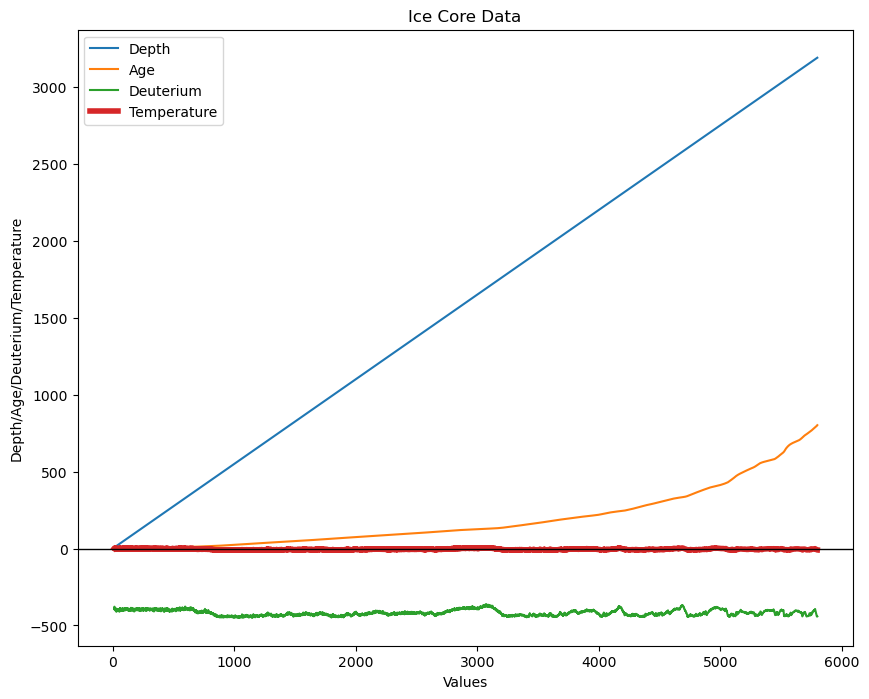

In [28]:
fig, ax = plt.subplots(figsize=(10, 8))
# Generate plot for all variables to see how they compare
ax.plot(EDC_dD_temp_estim['depth'], label='Depth')
ax.plot(EDC_dD_temp_estim['age'], label='Age')
ax.plot(EDC_dD_temp_estim['deuterium'], label='Deuterium')
ax.plot(EDC_dD_temp_estim['temp'], label='Temperature',linewidth=4)

min_temp=EDC_dD_temp_estim['temp'].min()
 # this acts as a guideline for the temperature
 # so that we can see if the temp increases or decreases, or remains unchanged over the years
plt.axhline(y=0, color='black', linestyle='-',linewidth=1 , label='')

# Annotate start and end points for each column
for column in ['depth', 'age', 'deuterium', 'temp']:
    start_point = EDC_dD_temp_estim[column].iloc[0]
    end_point = EDC_dD_temp_estim[column].iloc[-1]
    max_point=EDC_dD_temp_estim[column].max()
    ax.annotate(f'End: {end_point}', xy=(420000, end_point), xytext=(-80, 0),
                textcoords='offset points', color='black')
    #ax.annotate(f'End: {end_point}', xy=(420000, end_point), xytext=(-80, 0),
    #            textcoords='offset points', color='black')
    

ax.set_xlabel('Values')
ax.set_ylabel('Depth/Age/Deuterium/Temperature')
ax.set_title('Ice Core Data')
ax.legend()
plt.show()


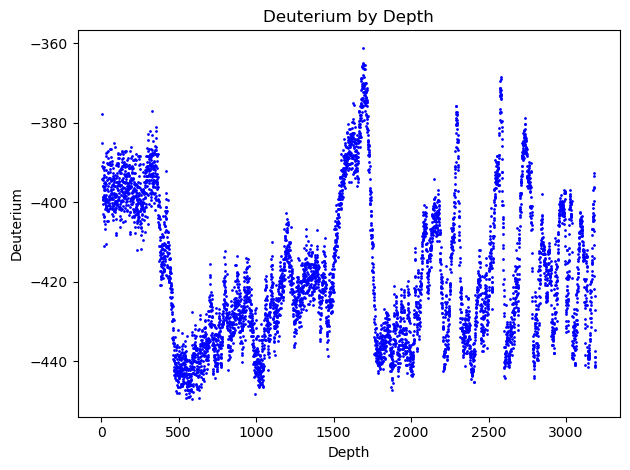

In [29]:


fig = plt.figure()
plt.scatter(EDC_dD_temp_estim['depth'], EDC_dD_temp_estim['deuterium'], c='b', s=1)
plt.title('Deuterium by Depth')
plt.xlabel('Depth')
plt.ylabel('Deuterium')
plt.tight_layout()
plt.show()





### Plot showing Deuterium vs Temperature

From this plot we can see that
- The peaks and troughs match for both Deterium and Temperature
- As the Deterium (gas/C02) levels rise, so does the temperature peaks
- As the Deterium (gas/C02) levels lower, likewise the Temperature troughs match 


Which indicates a direct correlation between both.


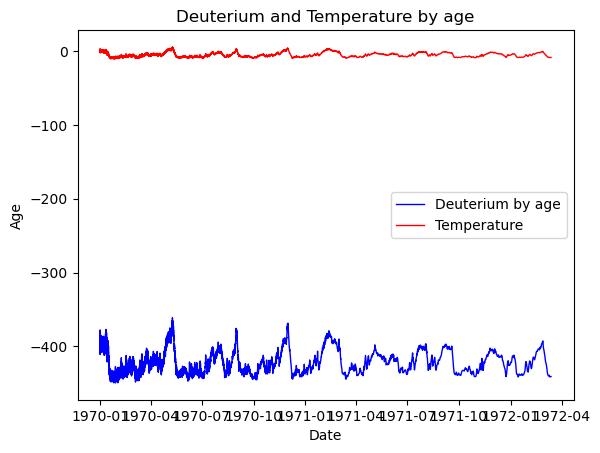

In [30]:
fig = plt.figure()
plt.plot_date(EDC_dD_temp_estim['age'], EDC_dD_temp_estim['deuterium'], '-b',label='Deuterium by age',linewidth=1)
plt.plot_date(EDC_dD_temp_estim['age'], EDC_dD_temp_estim['temp'], '-r',label='Temperature',linewidth=1)
plt.legend(loc="best")
plt.xlabel('Date')
plt.ylabel('Age')
plt.title('Deuterium and Temperature by age')
plt.show()


***
## Process epicaDC.deuttemp.EDC3-AICC.csv

### Jouzel data

Ref [[8]](#References) Jean Jouzel



In [31]:
####################################
###
### Process epicaDC.deuttemp.EDC3-AICC.csv
###
####################################

#
# Note,needed to add skipinitialspace=True 
# to get the read_csv to work.
#
#Depth (m)	EDC3_gas_a (yr)	Gasage (AICC2012, yr BP)	CO2 (ppmv)	sigma (ppmv)	station	uni	source file
#bag	ztop	EDC3béta  	AICC2012	  deutfinal	  temp	  acc-EDC3beta

epicaDCdeuttempEDC3AICC=pd.read_csv('data/epicaDC.deuttemp.EDC3-AICC.csv')                                    
'''
epicaDCdeuttempEDC3AICC=read_csv_strip('data/epicaDC.deuttemp.EDC3-AICC.csv', \
                ['Bag', 'Depth (m)', 'EDC3_gas_a (yr)', 'Gasage (AICC2012, yr BP)', \
                 'deutfinal', 'temp', 'acc-EDC3beta'],\
                  92, 'unicode_escape', \
               True, True, True, True, date_columns=[])
'''

#print('>>>>>>>>>epicaDCdeuttempEDC3AICC:', epicaDCdeuttempEDC3AICC.head())
#print('>>>>>>>>>epicaDCdeuttempEDC3AICC:', epicaDCdeuttempEDC3AICC.tail())

#epicaDCdeuttempEDC3AICC = pd.read_csv('data/epicaDC.deuttemp.EDC3-AICC.csv',  \
#                   skiprows=92,   \
#                   names=['Bag', 'Depth (m)', 'EDC3_gas_a (yr)', 'Gasage (AICC2012, yr BP)', \
#                          'deutfinal', 'temp', 'acc-EDC3beta'], \
#                   names=['bag', 'ztop', 'EDC3béta', 'AICC2012', 'deutfinal', 'temp', 'acc-EDC3beta'], \
#                    skip_blank_lines=True, skipinitialspace=True )
#, encoding='unicode_escape',keep_default_na=True,na_filter=True)
#                   names=['Bag', 'Depth (m)', 'EDC3_gas_a (yr)', 'Deuterium', 'Temperature'], \

epicaDCdeuttempEDC3AICC.rename(columns={'EDC3béta': 'EDC3_gas_a (yr)', \
                'ztop': 'Depth (m)', \
                   'CO2 (ppmv).1': 'CO2 (ppmv)', #
                    'deutfinal' : 'Deuterium'    }, inplace=True)

#Now add in some constants to standardise the data frame
epicaDCdeuttempEDC3AICC['station'] = 'EPICA Dome C'
epicaDCdeuttempEDC3AICC['uni'] = 'NOAA/NCDC'

# Convert kelvin to celsius
#Call it Temperature as per other data sets
epicaDCdeuttempEDC3AICC['Temperature'] = kelvinToCelsius(epicaDCdeuttempEDC3AICC['temp'])

print(epicaDCdeuttempEDC3AICC.head(30))

# write out to csv, may not be necessary, but handy for checking data
save_filename = 'data/generated/epicaDC.deuttemp.EDC3-AICC.csv.new.csv'
if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
epicaDCdeuttempEDC3AICC.to_csv(save_filename, index=False)

#print(epicaDCdeuttempEDC3AICC.head())
#print(epicaDCdeuttempEDC3AICC.tail())



    bag  Depth (m)  EDC3_gas_a (yr)    AICC2012  Deuterium   temp  \
0     1       0.00       -50.000000  -55.000000        NaN  218.3   
1     2       0.55       -43.559770  -50.513333        NaN  218.3   
2     3       1.10       -37.440190  -46.026667        NaN  218.3   
3     4       1.65       -31.641560  -41.540000        NaN  218.3   
4     5       2.20       -24.552780  -34.516667        NaN  218.3   
5     6       2.75       -17.784220  -27.493333        NaN  218.3   
6     7       3.30       -11.013050  -20.470000        NaN  218.3   
7     8       3.85        -3.270300  -12.213333        NaN  218.3   
8     9       4.40         5.447842   -3.956667        NaN  218.3   
9    10       4.95        13.529990    4.300000        NaN  218.3   
10   11       5.50        22.272840   13.220000        NaN  218.3   
11   12       6.05        30.709870   22.140000        NaN  218.3   
12   13       6.60        38.517570   31.060000     -390.9  218.3   
13   14       7.15        47.00211

#### Plot for epicaDCdeuttempEDC3AICC

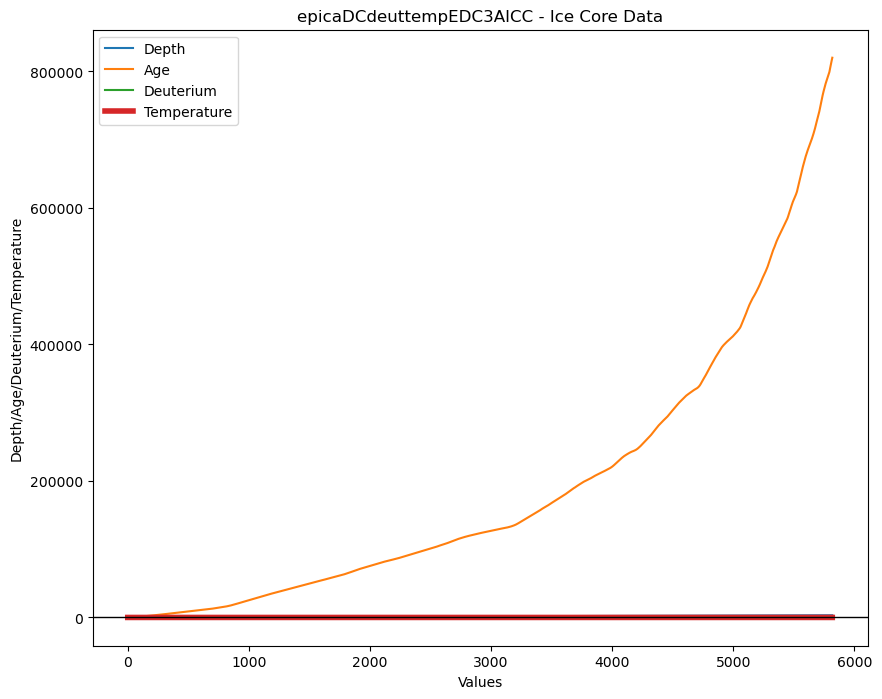

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))
# Generate plot for all variables to see how they compare
# bag	Depth (m)	EDC3_gas_a (yr)	AICC2012	deutfinal	temp	acc-EDC3beta	station	uni	Temperature
ax.plot(epicaDCdeuttempEDC3AICC['Depth (m)'], label='Depth')
ax.plot(epicaDCdeuttempEDC3AICC['EDC3_gas_a (yr)'], label='Age')
ax.plot(epicaDCdeuttempEDC3AICC['Deuterium'], label='Deuterium')
ax.plot(epicaDCdeuttempEDC3AICC['Temperature'], label='Temperature',linewidth=4)

min_temp=epicaDCdeuttempEDC3AICC['temp'].min()
 # this acts as a guideline for the temperature
 # so that we can see if the temp increases or decreases, or remains unchanged over the years
plt.axhline(y=0, color='black', linestyle='-',linewidth=1 , label='')

# Annotate start and end points for each column``
for column in ['Depth (m)', 'EDC3_gas_a (yr)', 'Deuterium', 'Temperature']:
    start_point = epicaDCdeuttempEDC3AICC[column].iloc[0]
    end_point = epicaDCdeuttempEDC3AICC[column].iloc[-1]
    max_point=epicaDCdeuttempEDC3AICC[column].max()
    ax.annotate(f'End: {end_point}', xy=(420000, end_point), xytext=(-80, 0),
                textcoords='offset points', color='black')
    #ax.annotate(f'End: {end_point}', xy=(420000, end_point), xytext=(-80, 0),
    #            textcoords='offset points', color='black')
    

ax.set_xlabel('Values')
ax.set_ylabel('Depth/Age/Deuterium/Temperature')
ax.set_title('epicaDCdeuttempEDC3AICC - Ice Core Data')
ax.legend()
plt.show()


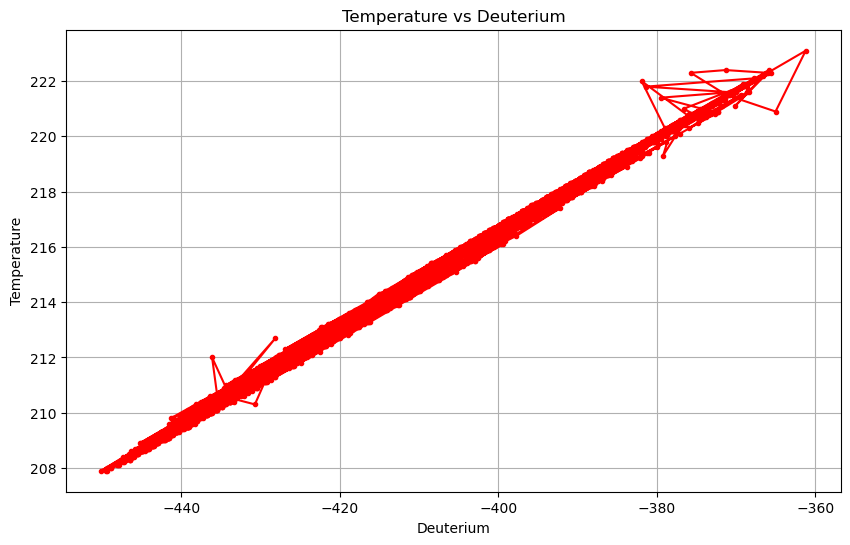

In [33]:
# Plotting temp against EDC3_gas_a (yr)
plt.figure(figsize=(10, 6))
plt.plot(epicaDCdeuttempEDC3AICC['Deuterium'], epicaDCdeuttempEDC3AICC['temp'], marker='.', linestyle='-', color='r')

# Adding labels and title
plt.xlabel('Deuterium')
plt.ylabel('Temperature')
plt.title('Temperature vs Deuterium')

# Show the plot
plt.grid(True)
plt.show()

### Plot Temperature vs Deuterium
The above plot, "Temperature vs Deuterium" shows the direct corrolation between Temperature and Deuterium.
This supports the scientific notion that Deuterium in the ice pack (in Antarctica) can be used to determin atmospheric temperature changes.

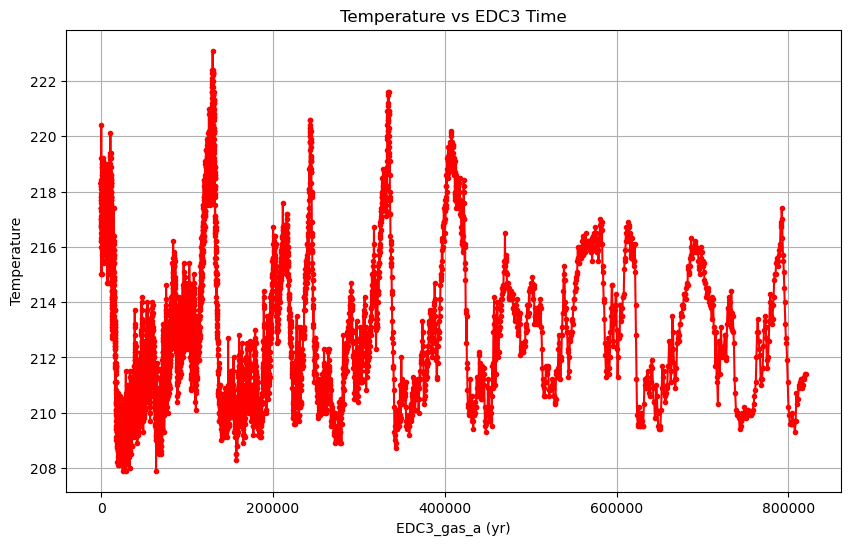

In [34]:
# Plotting temp against EDC3_gas_a (yr)
plt.figure(figsize=(10, 6))
plt.plot(epicaDCdeuttempEDC3AICC['EDC3_gas_a (yr)'], epicaDCdeuttempEDC3AICC['temp'], marker='.', linestyle='-', color='r')

# Adding labels and title
plt.xlabel('EDC3_gas_a (yr)')
plt.ylabel('Temperature')
plt.title('Temperature vs EDC3 Time')

# Show the plot
plt.grid(True)
plt.show()

## Process Met Eireann Data

**Data File dly532.csv**

This is a real world time series data csv file available for download from met.ie.

https://data.gov.ie/dataset/dublin-airport-daily-data/resource/1b93c37c-f2fa-4c79-827f-ec53a7db56b0

This particular data set is from Dublin Airport weather station.

It represents the historical weather in Ireland from 1942 through to Sep 2023.

The various data fields are explained in the first 25 lines of the dly532.csv file.

date:   -  00 to 00 utc

rain:   -  Precipitation Amount (mm)

maxtp:  -  Maximum Air Temperature (C)

mintp:  -  Minimum  Air Temperature (C)

gmin:   -  09utc Grass Minimum Temperature (C)

soil:   -  Mean 10cm Soil Temperature (C)

wdsp:   -  Mean Wind Speed (knot)

hm:     -  Highest ten minute mean wind speed (knot)	

ddhm:   -  Wind Direction at max 10 min. mean (deg)   

hg:     -  Highest Gust (knot)

cbl:    -  Mean CBL Pressure (hpa)

sun:    -  Sunshine duration (hours)

g_rad:  -  Global Radiation (j/cm sq.)

pe:     -  Potential Evapotranspiration (mm)	

evap:   -  Evaporation (mm)			

smd_wd: -  Soil Moisture Deficits(mm) well drained	

smd_md: -  Soil Moisture Deficits(mm) moderately drained

smd_pd: -  Soil Moisture Deficits(mm) poorly drained 

ind:    -  Indicator (i)


In [35]:
# Open and process the Met Eireann weather data
met=pd.read_csv('data/Met Eireann/dly532.csv', skiprows=25, sep=',',\
                usecols = ['date','maxtp','mintp','rain','sun','wdsp','hm'],parse_dates=["date"])

df1 = met.filter(like='date')
met['Invalid dates']=((df1.apply(lambda x:pd.to_datetime(x,format='%d-%m-%Y',errors='coerce'))
                        .isna() & df1.notna())
                        .dot(df1.columns + ',')
                        .str[:-1]
                        .replace('', np.nan))

save_filename = 'data/generated/met_new.csv'
if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
met.to_csv(save_filename, index=False)

print(met.dtypes)
#print(met.describe())
#rint(met.head())

# sub set of data for 1 day per month e.g. 01/01/1900
met_1day_per_month= met[met['date'].dt.day == 1].copy() # onlysubset of data, extract for 2022
met_1day_per_month['date'] = pd.to_datetime(met_1day_per_month['date'], format='%d-%b-%Y') # convert string date column to an actual date datatype
met_1day_per_month['month'] = met_1day_per_month['date'].dt.strftime('%b') # create new column with 3 char month

# sub set of data for year 2010, as rainfall looks interesting (read high!)
# here we drill down even closer to the full year's data 
met_2010= met[met['date'].dt.year == 2010].copy() # onlysubset of data, extract for 2022
met_2010['date'] = pd.to_datetime(met_2010['date'], format='%d-%b-%Y') # convert string date column to an actual date datatype
met_2010['month'] = met_2010['date'].dt.strftime('%b') # create new column with 3 char month

# sub set of data for 09/2010, as rainfall looks interesting (read high!)
# here we drill down even closer to the full month's data 
met_2010_09= met[(met['date'].dt.year == 2010) & (met['date'].dt.month == 9)] # onlysubset of data, extract for Sep 2010
met_2010_09['date'] = pd.to_datetime(met_2010_09['date'], format='%d-%b-%Y') # convert string date column to an actual date datatype
met_2010_09['month'] = met_2010_09['date'].dt.strftime('%b') # create new column with 3 char month
#print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>met_2010_09.head',met_2010_09.head())

# sub set of data for year 2020, as rainfall looks interesting (read high!)
met_2020= met[met['date'].dt.year == 2020].copy() # onlysubset of data, extract for 2020
met_2020['date'] = pd.to_datetime(met_2020['date'], format='%d-%b-%Y') # convert string date column to an actual date datatype
met_2020['month'] = met_2020['date'].dt.strftime('%b') # create new column with 3 char month

# sub set of data for year 1980, as rainfall looks interesting (read high!)
met_1980= met[met['date'].dt.year == 1980].copy() # onlysubset of data, extract for 1980
met_1980['date'] = pd.to_datetime(met_1980['date'], format='%d-%b-%Y') # convert string date column to an actual date datatype
met_1980['month'] = met_1980['date'].dt.strftime('%b') # create new column with 3 char month

# ref: https://www.hastings.gov.uk/content/event-planning/pdfs/Beaufort_Wind_Scale.pdf
# 22-27 knots - Strong Breeze
# 28-33 knots - Moderate or Near Gale
# 34-40 knots - Gale or Fresh Gale
# 41-47 knots - Strong Gale
# 48-55 knots - Whole Gale or Storm
# 56-63 knots - Violent Storm
# 64+ knots - Hurricane
met_winds_of_interest=met[met['wdsp'] > 10].copy()
#print('met_storms.shape>', met_winds_of_interest.shape)
#print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>met_winds_of_interest.head',met_winds_of_interest.head())

# 48-55 knots
# ref: https://www.hastings.gov.uk/content/event-planning/pdfs/Beaufort_Wind_Scale.pdf
#met_whole_Gale_or_storm=met[met['wdsp']>=48 & met['wdsp']<=55].copy()
#print('met_whole_Gale_or_storm.shape>', met_whole_Gale_or_storm.shape)


# 56-63 knots
# ref: https://www.hastings.gov.uk/content/event-planning/pdfs/Beaufort_Wind_Scale.pdf
#met_violent_storm=met[met['wdsp']>=56 & met['wdsp']<=63].copy()
met_violent_storm=met[met['wdsp'].between(56, 63)].copy()
#print('met_violent_storm.shape>', met_violent_storm.shape)

# 64+ knots
# ref: https://www.hastings.gov.uk/content/event-planning/pdfs/Beaufort_Wind_Scale.pdf
met_hurricane=met[met['wdsp']>63].copy()
#print('met_hurricane.shape>', met_hurricane.shape)





date             datetime64[ns]
maxtp                   float64
mintp                   float64
rain                    float64
wdsp                    float64
hm                       object
sun                     float64
Invalid dates           float64
dtype: object


### In this first plot I display an overview of min and max temps, along with rainfall.
### Of interest is a peak in the rainfall in 2010

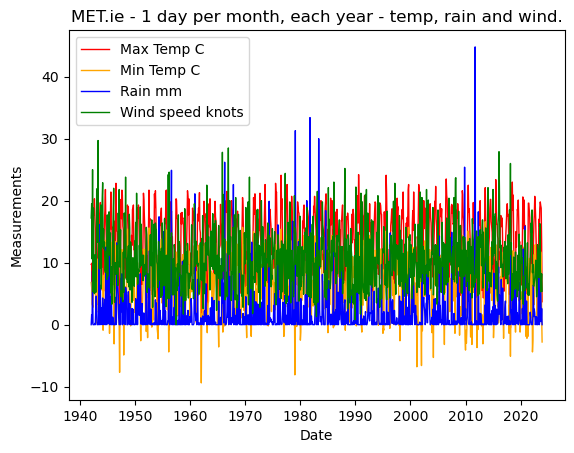

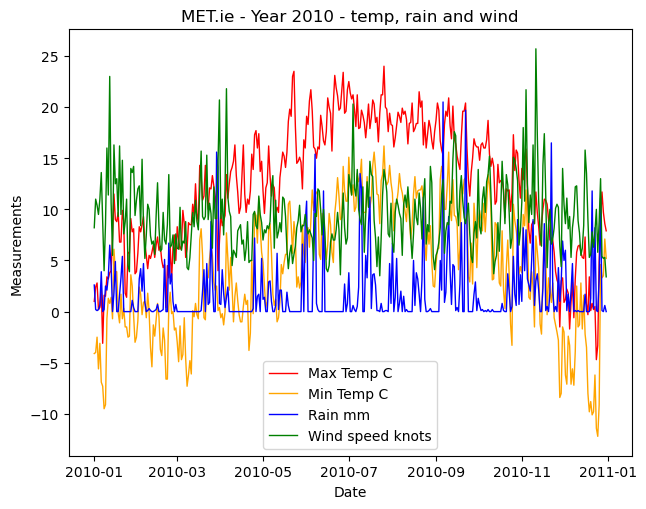

In [36]:

# Plot showing rain, temps and wind speed
# for 1 day a month for each year.
fig = plt.figure()
plt.plot_date(met_1day_per_month['date'], met_1day_per_month['maxtp'], '-r',label='Max Temp C',linewidth=1)
plt.plot_date(met_1day_per_month['date'], met_1day_per_month['mintp'], '-', color="orange",label='Min Temp C',linewidth=1)
plt.plot_date(met_1day_per_month['date'], met_1day_per_month['rain'], '-b',label='Rain mm',linewidth=1)
plt.plot_date(met_1day_per_month['date'], met_1day_per_month['wdsp'], '-g',label='Wind speed knots',linewidth=1)
plt.legend(loc="best")
plt.xlabel('Date')
plt.ylabel('Measurements')
plt.title('MET.ie - 1 day per month, each year - temp, rain and wind.')
plt.show()


# Plot showing rain, temps and wind speed
# for year 2010.
fig = plt.figure()
plt.plot_date(met_2010['date'], met_2010['maxtp'], '-r',label='Max Temp C',linewidth=1)
plt.plot_date(met_2010['date'], met_2010['mintp'], '-', color="orange",label='Min Temp C',linewidth=1)
plt.plot_date(met_2010['date'], met_2010['rain'], '-b',label='Rain mm',linewidth=1)
plt.plot_date(met_2010['date'], met_2010['wdsp'], '-g',label='Wind speed knots',linewidth=1)
plt.legend(loc="best")
fig.tight_layout()
plt.xlabel('Date')
plt.ylabel('Measurements')
plt.title('MET.ie - Year 2010 - temp, rain and wind')
plt.show()



### Following from the above observation.
### In this plot I investigate the heavy rainfall in Sep 2010
### and investigate if there is any correlation with high temps or wind (e.g. storm).
###
### There are 2 peaks of rain.
###
### The largest of 20.5mm does not coincide with a peak in temps of 15.3C.
### This does match a peak in wind speed of 12.90 knots.
### However this wuld be considered a 'Moderate Breeze', so no strom present.
### (Ref as per https://www.hastings.gov.uk/content/event-planning/pdfs/Beaufort_Wind_Scale.pdf)
### The second peak in rain of 19.7mm does coincide with a peak in heat of 20.4C
### There is no peak in wind speed at this point, and therefore no storm is apparent.

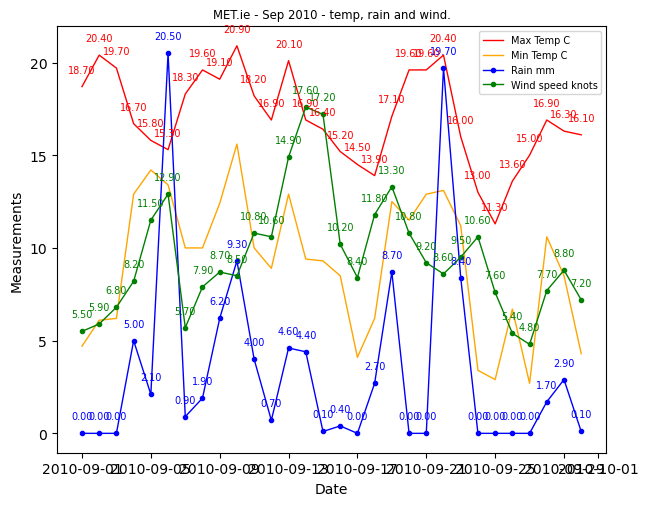

In [37]:
fig = plt.figure()
plt.plot_date(met_2010_09['date'], met_2010_09['maxtp'], '-r',label='Max Temp C',linewidth=1)
plt.plot_date(met_2010_09['date'], met_2010_09['mintp'], '-', color="orange",label='Min Temp C',linewidth=1)
plt.plot_date(met_2010_09['date'], met_2010_09['rain'], '-b',label='Rain mm',linewidth=1,marker=".")
plt.plot_date(met_2010_09['date'], met_2010_09['wdsp'], '-g',label='Wind speed knots',linewidth=1,marker=".")

plt.legend(loc="best")
fig.tight_layout()
plt.rcParams.update({'font.size': 7})

# display values for peaks for rain
# Based on code from 
# https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
for x,y in zip(met_2010_09['date'],met_2010_09['rain']):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 color='blue',
                 ha='center') # horizontal alignment can be left, right or center


# display values for peaks for max temp
# Based on code from 
# https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
for x,y in zip(met_2010_09['date'],met_2010_09['maxtp']):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 color='red',
                 ha='center') # horizontal alignment can be left, right or center

# display values for peaks for wind speed
# Based on code from 
# https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
for x,y in zip(met_2010_09['date'],met_2010_09['wdsp']):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 color='green',
                 ha='center') # horizontal alignment can be left, right or center
                         

plt.xlabel('Date')
plt.ylabel('Measurements')
plt.title('MET.ie - Sep 2010 - temp, rain and wind.')
plt.legend(loc="best")
plt.show()



## Next I will attempt to demonstrate the orange and red warnings that
## Met Eireann uses for it's weather warnings.

This is based on Met Eireann's scale as found at met.ie Ref [[16]](#References)

For this wind analysis, I'll use a wind specific dataset as found at [[16]](#References)

dly1075.csv from https://data.gov.ie/dataset/malin-head-hourly-data


met_wind_orange               date  ind maxtp  ind.1 mintp igmin gmin  ind.2 rain    cbl  ...  \
14596  24-dec-1997  NaN  12.9    NaN   8.2               NaN  5.4  991.3  ...   

      ddhm  ind.5  hg  soil pe  evap smd_wd smd_md smd_pd glorad  
14596         NaN  89                                             

[1 rows x 24 columns]
met_wind_red Empty DataFrame
Columns: [date, ind, maxtp, ind.1, mintp, igmin, gmin, ind.2, rain, cbl, wdsp, ind.3, hm, ind.4, ddhm, ind.5, hg, soil, pe, evap, smd_wd, smd_md, smd_pd, glorad]
Index: []

[0 rows x 24 columns]
met_rain_orange Empty DataFrame
Columns: [date, maxtp, mintp, rain, wdsp, hm, sun, Invalid dates]
Index: []
met_rain_red Empty DataFrame
Columns: [date, maxtp, mintp, rain, wdsp, hm, sun, Invalid dates]
Index: []


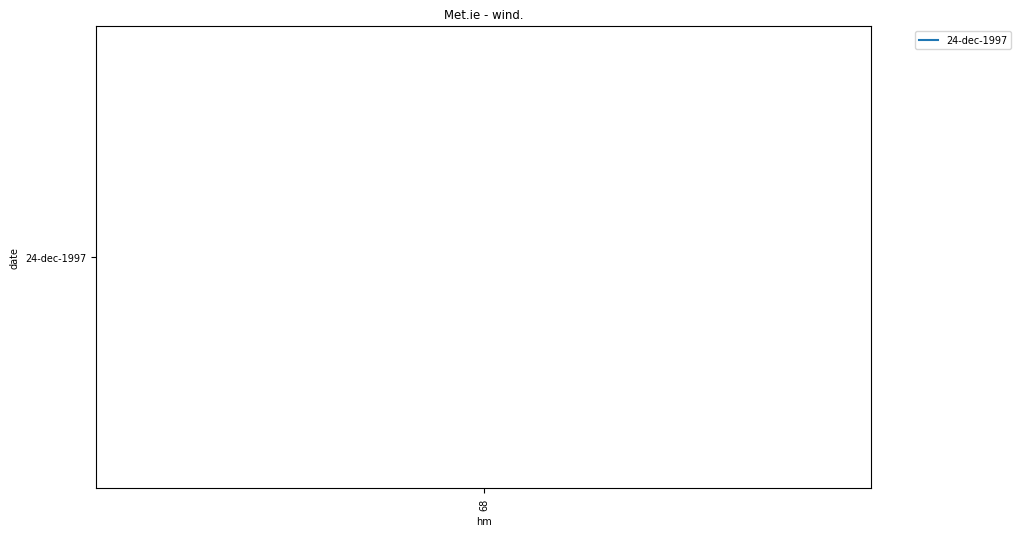

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


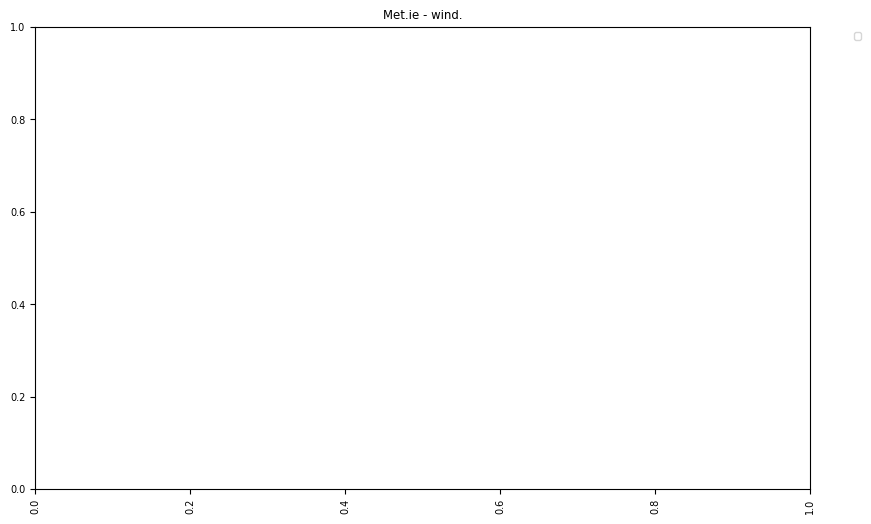

"\nplt.figure(figsize=(10, 6))\nsns.lineplot(y='CO2 (ppmv)', x='Depth_m', data=df_all_copy, hue='source file')\nplt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')\nplt.xticks(rotation=90)\nplt.title='Comparison of CO2 (ppmv) for Depth (m) between 2 data sources.' \nplt.show()\n"

In [64]:

# I use this to ignore zero/blank/Nan values
na_values = ['', 0, 'NaN', 'NA']


#df_temp = pd.read_csv('data/Met Eireann/dly1075.csv', skiprows=23, na_values=na_values)
#met_wind = df_temp[df_temp['hm'].notna() & (df_temp['hm'] != 0) & (df_temp['hm'] != '')]


met_wind = pd.read_csv('data/Met Eireann/dly1075.csv', skiprows=23, na_values=na_values)

#print(met_wind.dtypes)
#print(met_wind.head(20))

allowed_values = ['65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79']
met_wind_orange=met_wind[met_wind['hm'].isin(allowed_values)].copy() 
print('met_wind_orange',met_wind_orange.head())

allowed_values = ['80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90']
met_wind_red=met_wind[met_wind['hm'].isin(allowed_values)].copy()
print('met_wind_red',met_wind_red.head())


allowed_values = ['50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65' \
                    , '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79']
met_rain_orange=met[met['rain'].isin(allowed_values)].copy()
print('met_rain_orange', met_rain_orange.head())

allowed_values = ['80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90']
met_rain_red=met[met['rain'].isin(allowed_values)].copy()
print('met_rain_red', met_rain_red.head())

#print(met_wind_orange.head(20))
# temp is a little more complicated,
# as orange/red involves the same temps (max>=30 and min>=20)
# but the difference being number of consecutive days.
# So I'll use just the min temp and max temp to decide
# if the temp deserves a warning status.
# Just orange and red are included, I have ignored yellow warning status. 
met_temp_warning=met[(met['maxtp'].ge(30)) & (met['mintp'].ge(20))].copy()
#met_2010_09= met[(met['date'].dt.year == 2010) & (met['date'].dt.month == 9)]

# Plot Met.ie wind orange warnings
plt.figure(figsize=(10, 6))
sns.lineplot(y='date', x='hm', data=met_wind_orange, hue='date')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title('Met.ie - wind.')
plt.show()

# Plot Met.ie rain orange warnings
plt.figure(figsize=(10, 6))
sns.lineplot(y='date', x='rain', data=met_rain_orange, hue='date')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title('Met.ie - wind.')
plt.show()


'''
plt.figure(figsize=(10, 6))
sns.lineplot(y='CO2 (ppmv)', x='Depth_m', data=df_all_copy, hue='source file')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title='Comparison of CO2 (ppmv) for Depth (m) between 2 data sources.' 
plt.show()
'''


### Show temperatures and display the mean
### This may indicate if the temperature is rising over time.



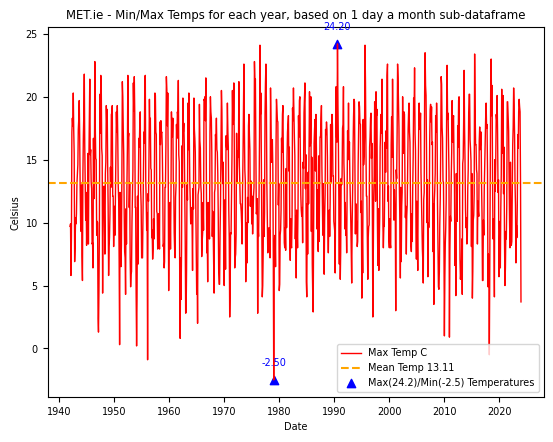

In [ ]:
# Here we plot using the 1 day per month dataframe
# Calculate the mean
mean_temp = np.mean(met_1day_per_month['maxtp'])
max_temp = np.max(met_1day_per_month['maxtp'])
min_temp = np.min(met_1day_per_month['maxtp'])

fig = plt.figure()
plt.plot_date(met_1day_per_month['date'], met_1day_per_month['maxtp'], '-r',label='Max Temp C',linewidth=1)
plt.axhline(y=mean_temp, color='orange', linestyle='--', label='Mean Temp ' + str(round(mean_temp,2)))
plt.title('MET.ie - Min/Max Temps for each year, based on 1 day a month sub-dataframe')

# Mark the maximum and minimum temperatures
plt.scatter([met_1day_per_month['date'][met_1day_per_month['maxtp'].idxmax()], \
             met_1day_per_month['date'][met_1day_per_month['maxtp'].idxmin()]],
            [max_temp, min_temp],
            color='b', marker='^', 
            label='Max(' + str(round(max_temp,2)) +')' \
                + '/Min(' + str(round(min_temp,2)) + ') Temperatures')

for x,y in zip(met_1day_per_month['date'],met_1day_per_month['maxtp']):
    label = "{:.2f}".format(y)
    if y==max_temp or y==min_temp or y>25:
        plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 color='blue',
                 ha='center') # horizontal alignment can be left, right or center
    
plt.legend(loc="best")
plt.xlabel('Date')
plt.ylabel('Celsius')
plt.show()


### Next a similar temperature plot but only for the "hotter" months of May, June, July, August and September.
### Of note is high temperatures only started in 80s-90s, and then again not until 2020 onwards.

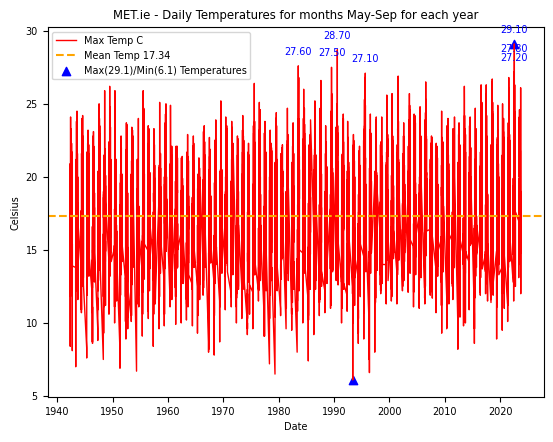

In [ ]:
# Here we plot using the hotter months dataframe.
# This includes weather data for months May, June, July, August and September.
# Convert 'Date' column to datetime format
met['DateFormatted'] = pd.to_datetime(met['date'], format='%d-%b-%Y', errors='coerce')
met_hotter_months= met[(met['DateFormatted'].dt.month.isin([5,6,7,8,9]))].copy() # onlysubset of data, extract for 2022
met_hotter_months['date'] = pd.to_datetime(met_hotter_months['date'], format='%d-%b-%Y', errors='coerce')
# convert string date column to an actual date datatype
met_hotter_months['month'] = met_hotter_months['date'].dt.strftime('%b') # create new column with 3 char month

# Get the mean, max and min temps.
mean_temp = np.mean(met_hotter_months['maxtp'])
max_temp = np.max(met_hotter_months['maxtp'])
min_temp = np.min(met_hotter_months['maxtp'])

fig = plt.figure()
plt.plot_date(met_hotter_months['date'], met_hotter_months['maxtp'], '-r',label='Max Temp C',linewidth=1)
plt.axhline(y=mean_temp, color='orange', linestyle='--', label='Mean Temp ' + str(round(mean_temp,2)))

# Mark the maximum and minimum temperatures
plt.scatter([met_hotter_months['date'][met_hotter_months['maxtp'].idxmax()], \
             met_hotter_months['date'][met_hotter_months['maxtp'].idxmin()]],
            [max_temp, min_temp],
            color='b', marker='^', 
            label='Max(' + str(round(max_temp,2)) +')' \
                + '/Min(' + str(round(min_temp,2)) + ') Temperatures')

for x,y in zip(met_hotter_months['date'],met_hotter_months['maxtp']):
    label = "{:.2f}".format(y)
    if y>=max_temp-2:
        plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,8), # distance from text to points (x,y)
                 color='blue',
                 ha='center') # horizontal alignment can be left, right or center
    
plt.legend(loc="best")
plt.xlabel('Date')
plt.ylabel('Celsius')
plt.title('MET.ie - Daily Temperatures for months May-Sep for each year')
plt.show()


### Here we plot using a dataframe for all temps 25c or hotter.
#### This plot imparts many valuable pieces of information.
####
- Between the start of the data (Jan-1942) and up to mid 1980s', only 2 temps above the mean were recorded
- The temperatures remain close to the mean (~26C) right up until the early 1980s
- This means that heatwaves above 26c really onlt started in the 1980's onwards
- Between 1990 - 2010, we see 4 peaks above the mean, but in a downward slope
- This pattern then continues in an upwards temperature trend into the 2000's
- The top temp 29.1C for the dataset is rcorded on 18-Jul-2022
- The mean temperatue for the timeframe is 25.98C

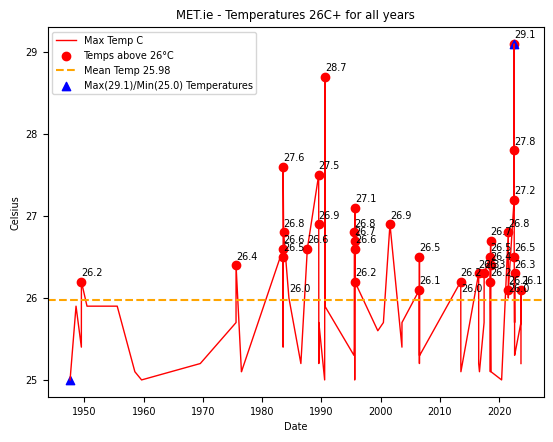

In [ ]:
# Here we plot using a dataframe for all temps 20c or hotter.
# Convert 'Date' column to datetime format
met['DateFormatted'] = pd.to_datetime(met['date'], format='%d-%b-%Y', errors='coerce')
met_temps_25p= met[(met['maxtp']>=25)].copy() # onlysubset of data, extract for 2022
met_temps_25p['date'] = pd.to_datetime(met_temps_25p['date'], format='%d-%b-%Y', errors='coerce')
# convert string date column to an actual date datatype
met_temps_25p['month'] = met_temps_25p['date'].dt.strftime('%b') # create new column with 3 char month

# Get the mean, max and min temps.
mean_temp = np.mean(met_temps_25p['maxtp'])
max_temp = np.max(met_temps_25p['maxtp'])
min_temp = np.min(met_temps_25p['maxtp'])

fig = plt.figure()
plt.plot_date(met_temps_25p['date'], met_temps_25p['maxtp'], '-r',label='Max Temp C',linewidth=1)

# Find peaks above 26 degrees Celsius
peaks_above_26 = met_temps_25p[met_temps_25p['maxtp'] > 26]
# Mark peaks above 26 degrees Celsius
plt.scatter(peaks_above_26['date'], peaks_above_26['maxtp'], color='r', label='Temps above 26°C')
for x,y in zip(peaks_above_26['date'],peaks_above_26['maxtp']):
    label = ""
    # this label was too crowded - label = x.strftime('%d-%b-%Y')
    plt.annotate(label, # this is the text
        (x,y), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        color='black',
        ha='center') # horizontal alignment can be left, right or center

# Draw a line for the mean temps
plt.axhline(y=mean_temp, color='orange', linestyle='--', label='Mean Temp ' + str(round(mean_temp,2)))

# Mark the maximum and minimum temperatures
plt.scatter([met_temps_25p['date'][met_temps_25p['maxtp'].idxmax()], \
             met_temps_25p['date'][met_temps_25p['maxtp'].idxmin()]],
            [max_temp, min_temp],
            color='b', marker='^', 
            label='Max(' + str(round(max_temp,2)) +')' \
                + '/Min(' + str(round(min_temp,2)) + ') Temperatures')

for x,y in zip(met_temps_25p['date'],met_temps_25p['maxtp']):
    label = str(y) #+ 'C' #+ x.strftime('%d-%b-%Y')
    #label = "{:.2f}".format(y) + 'C' #+ x.strftime('%d-%b-%Y')
    if y>=mean_temp:
        plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 color='black',
                 va='top', ha='left') # horizontal alignment can be left, right or center
    
plt.legend(loc="best")
plt.xlabel('Date')
plt.ylabel('Celsius')
plt.title('MET.ie - Temperatures 26C+ for all years')
plt.show()


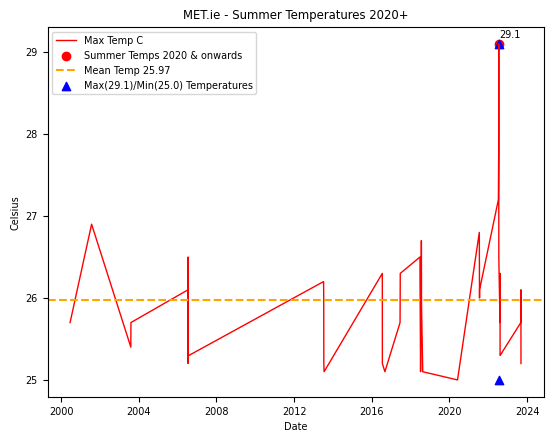

In [ ]:
# Here we plot using a dataframe for summer time 2020 onwards.
# Convert 'Date' column to datetime format
met['DateFormatted'] = pd.to_datetime(met['date'], format='%d-%b-%Y', errors='coerce')
met_temps_2020_onwards= met[(met['DateFormatted'].dt.year.ge(2000))].copy() # onlysubset of data, extract for 2022
met_temps_2020_onwards= met_temps_2020_onwards[(met_temps_2020_onwards['DateFormatted'].dt.month.isin([6,7,8,9]))].copy() # onlysubset of data, extract for 2022
met_temps_2020_onwards= met_temps_2020_onwards[(met_temps_2020_onwards['maxtp']>=25)].copy() # onlysubset of data, extract for 2022

met_temps_2020_onwards['date'] = pd.to_datetime(met_temps_2020_onwards['date'], format='%d-%b-%Y', errors='coerce')
# convert string date column to an actual date datatype
met_temps_2020_onwards['month'] = met_temps_2020_onwards['date'].dt.strftime('%b') # create new column with 3 char month

# Get the mean, max and min temps.
mean_temp = np.mean(met_temps_2020_onwards['maxtp'])
max_temp = np.max(met_temps_2020_onwards['maxtp'])
min_temp = np.min(met_temps_2020_onwards['maxtp'])

fig = plt.figure()
plt.plot_date(met_temps_2020_onwards['date'], met_temps_2020_onwards['maxtp'], '-r',label='Max Temp C',linewidth=1)

# Find peaks above 26 degrees Celsius
met_temps_2020_onwards = met_temps_2020_onwards[met_temps_2020_onwards['maxtp'] > 28]
# Mark peaks above 26 degrees Celsius
plt.scatter(met_temps_2020_onwards['date'], met_temps_2020_onwards['maxtp'], color='r', label='Summer Temps 2020 & onwards')
for x,y in zip(met_temps_2020_onwards['date'],met_temps_2020_onwards['maxtp']):
    label = ""
    # this label was too crowded - label = x.strftime('%d-%b-%Y')
    plt.annotate(label, # this is the text
        (x,y), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        color='black',
        ha='center') # horizontal alignment can be left, right or center

# Draw a line for the mean temps
plt.axhline(y=mean_temp, color='orange', linestyle='--', label='Mean Temp ' + str(round(mean_temp,2)))

# Mark the maximum and minimum temperatures
plt.scatter([met_temps_2020_onwards['date'][met_temps_2020_onwards['maxtp'].idxmax()], \
             met_temps_2020_onwards['date'][met_temps_2020_onwards['maxtp'].idxmin()]],
            [max_temp, min_temp],
            color='b', marker='^', 
            label='Max(' + str(round(max_temp,2)) +')' \
                + '/Min(' + str(round(min_temp,2)) + ') Temperatures')

for x,y in zip(met_temps_2020_onwards['date'],met_temps_2020_onwards['maxtp']):
    label = str(y) #+ 'C' #+ x.strftime('%d-%b-%Y')
    #label = "{:.2f}".format(y) + 'C' #+ x.strftime('%d-%b-%Y')
    if y>=mean_temp:
        plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 color='black',
                 va='top', ha='left') # horizontal alignment can be left, right or center
    
plt.legend(loc="best")
plt.xlabel('Date')
plt.ylabel('Celsius')
plt.title('MET.ie - Summer Temperatures 2020+')
plt.show()


### Plots for Met Eireann Data - rainfall.
This data may well provide an idea if rainfall and thus flooding is worsening over time.

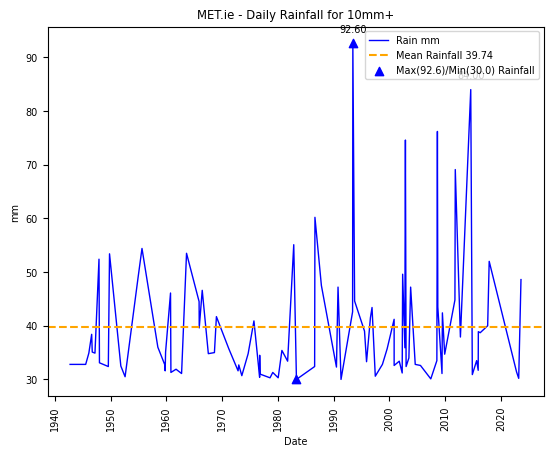

In [ ]:
# Here we plot the higher volumn rain falls.
# This includes data whereby rainfall is over 30mm.
met_high_rainfall= met[(met['rain']>=30)].copy() # onlysubset of data, extract for 30mm plus
met_high_rainfall['date'] = pd.to_datetime(met_high_rainfall['date'], format='%d-%b-%Y', errors='coerce')
# convert string date column to an actual date datatype
met_high_rainfall['year'] = met_high_rainfall['date'].dt.strftime('%Y') # create new column with 3 char month

#print(met_high_rainfall.head())

# Get the mean, max and min temps.
mean_rain = np.mean(met_high_rainfall['rain'])
max_rain = np.max(met_high_rainfall['rain'])
min_rain = np.min(met_high_rainfall['rain'])

fig = plt.figure()
plt.plot_date(met_high_rainfall['date'], met_high_rainfall['rain'], '-b',label='Rain mm',linewidth=1)
plt.axhline(y=mean_rain, color='orange', linestyle='--', label='Mean Rainfall ' + str(round(mean_rain,2)))

# Mark the maximum and minimum temperatures
plt.scatter([met_high_rainfall['date'][met_high_rainfall['rain'].idxmax()], \
             met_high_rainfall['date'][met_high_rainfall['rain'].idxmin()]],
            [max_rain, min_rain],
            color='b', marker='^', 
            label='Max(' + str(round(max_rain,2)) +')' \
                + '/Min(' + str(round(min_rain,2)) + ') Rainfall')

for x,y in zip(met_high_rainfall['date'],met_high_rainfall['rain']):
    label = "{:.2f}".format(y)
    if y>=max_rain-10:
        plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,8), # distance from text to points (x,y)
                 color='black',
                 ha='center') # horizontal alignment can be left, right or center
    
plt.legend(loc="best")
plt.xlabel('Date')
plt.ylabel('mm')
plt.title('MET.ie - Daily Rainfall for 10mm+')

plt.xticks(rotation = 90)

plt.show()


## Rainfall Conclusion
From the above plot we can assertain a number of important pieces of information.
 - 1940 through to 1990, rainfall was consistant and max is about 60mm on a day
    - The peaks are wider and shorter in nature
    - Suggesting less volume of rain falling over a longer timeframe
    - This would likely not cause severe flash flooding  
 - After 1990 we see max rainfalls increasing, and almost(!) doubled with a max of 92.6mm
 - The peaks after 2000 are narrower and taller, suggesting more sudden intense deluges of rain
    - This suggests an increase in flash flooding
    - Due to the sheer volume of rain in a short period of time
    - This type of rain has knock on effects 
    - e.g. mudslides, coastal erosion, bridge and road damage, homes and businesses destroyed
- This timeframe is similar to what we have seen with temperatures



# Met Eireann Data Analysis Findings

From what I can assertain from looking at the Met Eireann data, weather in itself is quite a random aspect of nature.

Firstly aspects like rain and wind seems to be quote random in nature, with no particukat patten repeating.
This may simply be storms occurring at any time of the year, inclusing during the summer.
Indeed although summer is mainly dryer and warmer, it has been demonstrated that heavy downpours still 
occur during this timeframe.

However one aspect that can certainly be seen to be increasing over time is teh temperature.
As seen on the temperature plots above, there is a definite increase in max temperatures during the summer.
This increase started in the 1980s, and continues to increase every year.

Indeed 2023 has now just been announced [[11]](#References) as the warmest on record, which further underlines my findings.



## Met Eireann Data - Conclusion

From the above plots this we can conclude:-
- Rainfall is increasing since 1990
- It is indeed a similar picture for temperatures which are only increasing year on year

The results of these increases can be seen regularly in news headlines
- Flooding is now more prominant due to high quentity of rainfall 
- This can (and does) lead to flash flooding
- Droughts are being experienced during summer months
- This leads to forest and scrubland fires, destroying property
- And all of the above factors are putting lives at risk, both livestock and human

### Now finally combine all files into one, and save as .csv and json files.

In [ ]:
##########################################
# Now finally combine all files into one
##########################################

all_combined=pd.concat([moesm31_combined,suppl_combined, edc3deuttemp2007, epicaDCdeuttempEDC3AICC, met])
all_combined = all_combined.reset_index()
# ref https://stackoverflow.com/questions/77478335/cleaning-dataframe-typeerror-not-supported-between-instances-of-str-and
all_combined['Depth (m)'] = pd.to_numeric(all_combined['Depth (m)'], errors='coerce')

# write out to csv, may not be necessary, but handy for checking data
save_filename = 'data/generated/all_combined.csv'
if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
all_combined.to_csv(save_filename, index=False)

# Now write out to JSON file
# Ref https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html
# Ref https://stackoverflow.com/questions/29271520/valueerror-dataframe-index-must-be-unique-for-orient-columns
save_filename = 'data/generated/all_combined.json'
if os.path.isfile(save_filename): os.remove(save_filename) # delete if exists
all_combined.to_json(save_filename,orient="split")

#print(all_combined.head)
#print(all_combined.tail)

***
## Ice Core Analysis

Ref [[17]](#References) ice core info from reading info at antarcticglaciers.org

How do ice cores work?
Basically snow and ice deposits layer one on top of another as years go by.
This allows scientists to drill for samples for analysis.

Samples of 100-200m are easier to collect. They provide information for several hundreds of years.

To go back earlier in time, larger drill holes are required.
This involves more time and equipment to extract lower the layers. Bore holes need to be kept open using drill fluid.

Extracting ice cores of up to 3000m requires a permanent scientific camp.
Due to it's complexity, the campaign would be multi-year.

Analysis and information can be obtained for:
- Accumulation rate
  - Obtained from the tickness of the ice/snow sample
- Melt layers
  - When snow melts during warmer summers, the water fills the snow pack under it
  - This forms bubble free ice layers
  - Measuring concentrations of gases in the layers provides a detailed record of temperature change, going back hundreds of thousands of years
- Past air temperatures 
  - Related directly to concentrations of carbon dioxide, methane and other greenhouse gasses preserved in the ice
-  Past greenhouse gasses
  - Air samples can be obtained from samples and gases examined
  - Air bubbles are extracted by melting/crushing/grating the ice in a vacuum
- Other uses of the ice core
  - Mineral dust accumulations
  - Volcanic activity
  - Sea salt concentrations demonstrates the extent of sea ice over time
 


moem_depth_min> 3026.58
moem_depth_max> 3190.28
df_all_copy.dtypes >>>>>>>> index                                  int64
Depth_m                              float64
EDC3_gas_a (yr)                      float64
Gasage (AICC2012, yr BP)             float64
CO2 (ppmv)                           float64
sigma (ppmv)                          object
station                               object
uni                                   object
source file                           object
Gasage (EDC3, yr BP)                 float64
sigma mean CO2 (ppmv)                 object
Gasage (TALDICE-1a, yr BP)           float64
Gasage (EDML1 Sz4, yr BP)            float64
Reference                            float64
Age (Ahn et al., 2008)               float64
Bag                                  float64
Age                                  float64
Deuterium                            float64
Temperature                          float64
calcDate                             float64
bag                     

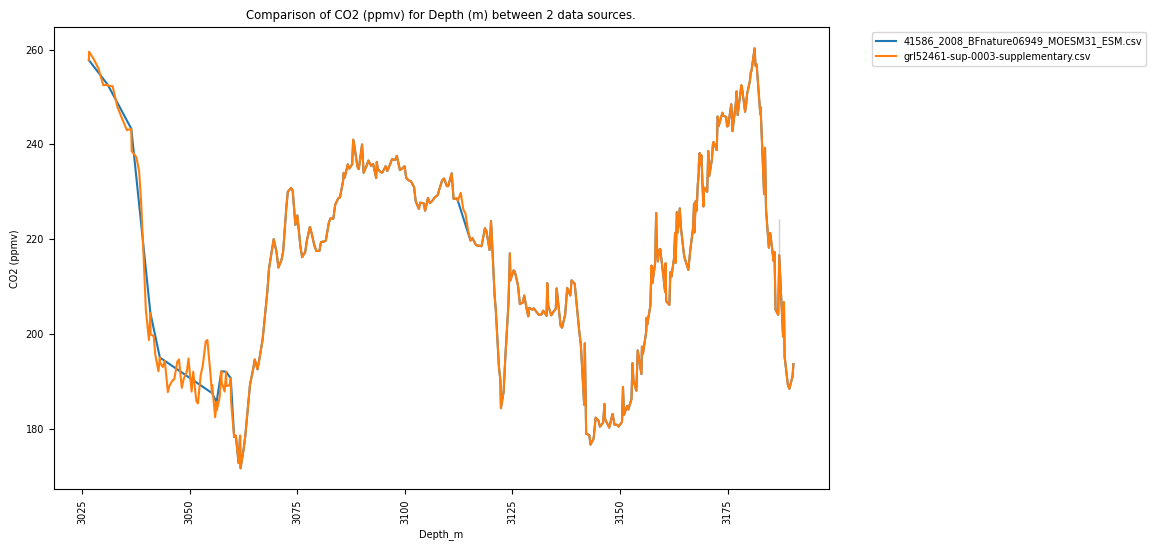

************************************ Temperate VS C02 *****************************************


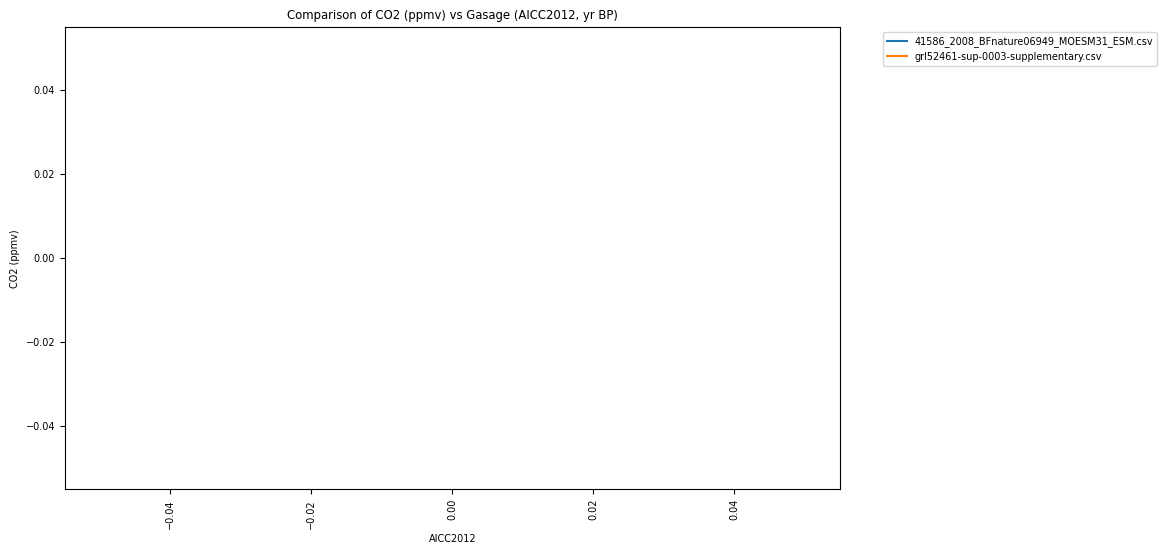

In [ ]:
# Build a list of the numerical variables, and then use in a loop.
# ref https://seaborn.pydata.org/generated/seaborn.histplot.html
#print(all_combined.dtypes)
#numeric_vars = ['(Depth m)', 'EDC3_gas_a (yr)', 'Gasage (AICC2012, yr BP)', 'CO2 (ppmv)', 'sigma (ppmv)']

numeric_vars = ['Depth (m)', 'EDC3_gas_a (yr)', 'Gasage (AICC2012, yr BP)', 'CO2 (ppmv)', 'sigma (ppmv)']

#################################
# Compare C02 between sources
#################################
#
# Look at depth of 3000m plus as moesm data for depths are greather than 3000m
# and want to compare like for like data from both datasets.
# Will use min value for moem dataset as a cutoff and look at anything >= than that value.
# Here I utilise min and max values of the moesm depth data.
# ref https://stackoverflow.com/questions/35873927/rounding-down-values-in-pandas-dataframe-column-with-nans
# ref https://www.geeksforgeeks.org/how-to-convert-float-to-int-in-python/
min_moem_depth=moesm31_combined['Depth (m)'].min()
max_moem_depth=moesm31_combined['Depth (m)'].max()

print('moem_depth_min>',min_moem_depth)
print('moem_depth_max>',max_moem_depth)


# ref https://sparkbyexamples.com/pandas/pandas-select-dataframe-rows-between-two-dates/
# and changed for depth
df_all_copy=all_combined.copy()
df_all_copy.rename(columns={'Depth (m)': 'Depth_m'}, inplace=True)


print('df_all_copy.dtypes >>>>>>>>',df_all_copy.dtypes)

df_all_copy = df_all_copy[df_all_copy["Depth_m"].between(min_moem_depth, max_moem_depth)]

plt.figure(figsize=(10, 6))
sns.lineplot(y='CO2 (ppmv)', x='Depth_m', data=df_all_copy, hue='source file')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title('Comparison of CO2 (ppmv) for Depth (m) between 2 data sources.')
plt.show()


#################################
# Temperate VS C02
#################################
#
print('************************************ Temperate VS C02 *****************************************')

#df_all_copy=all_combined.copy()
#df_all_copy= df_all_copy[df_all_copy['Temperature'] > 0].copy()
#df_all_copy = df_all_copy.reset_index()

#print('TEMP BEFORE FILTER df_all_copy.shape[0] >>>>>', df_all_copy.shape[0])
#print('TEMP AFTER FILTER df_all_copy.shape[0] >>>>>', df_all_copy.shape[0])
#print('################################## Temperature VS C02 dtypes>>>>>>>>',df_all_copy.dtypes)
#print('################################## Temperature VS C02 Describe>>>>>>>>',df_all_copy.describe())

plt.figure(figsize=(10, 6))
sns.lineplot(y='CO2 (ppmv)', x='AICC2012', data=df_all_copy, hue='source file')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title('Comparison of CO2 (ppmv) vs Gasage (AICC2012, yr BP)')
plt.show()


# C02 plot using composite data

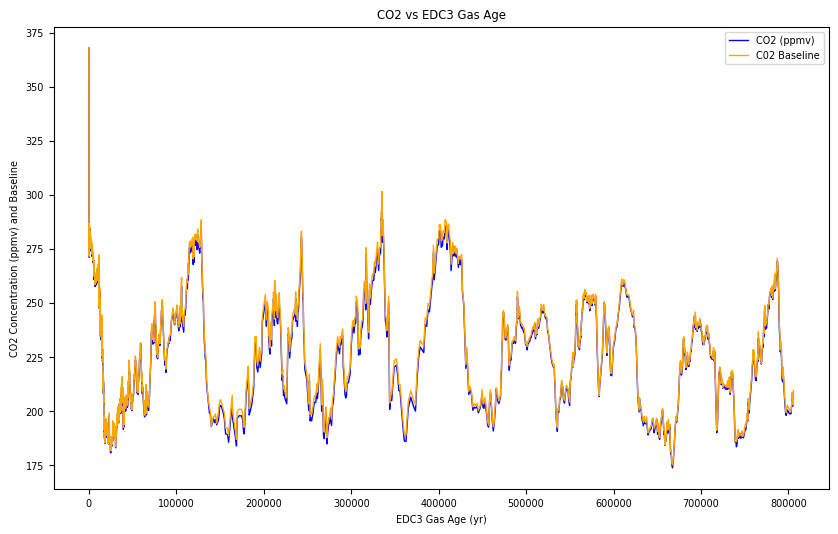

In [ ]:
# Plot CO2 against EDC3
#all_combined=pd.concat([moesm31_combined,suppl_combined, edc3deuttemp2007, epicaDCdeuttempEDC3AICC])
#print(all_combined.head())
df_composite=pd.read_csv('data/grl52461-sup-0003-supplementary-composite.csv', skiprows=14, usecols=["Gasage (yr BP) ", "CO2 (ppmv)", "sigma mean CO2 (ppmv)"])
df_composite.rename(columns={'Gasage (yr BP) ': 'Gasage (yr BP)'}, inplace=True)
df_composite['c02_baseline']=df_composite['CO2 (ppmv)'] + df_composite['sigma mean CO2 (ppmv)']

#print(df_composite.head())
#print(df_composite.dtypes)

plt.figure(figsize=(10, 6))
#plt.plot(df_composite['Gasage (yr BP)'], df_composite['CO2 (ppmv)'], marker='.', linestyle='-', color='b')
plt.plot(df_composite['Gasage (yr BP)'], df_composite['CO2 (ppmv)'], label='CO2 (ppmv)', linestyle='-', linewidth=1, color='b')
plt.plot(df_composite['Gasage (yr BP)'], df_composite['c02_baseline'],  label='C02 Baseline', linestyle='-', linewidth=1, color='orange')
plt.xlabel('EDC3 Gas Age (yr)')
plt.ylabel('CO2 Concentration (ppmv) and Baseline')
plt.title('CO2 vs EDC3 Gas Age')
plt.legend(loc="best")
plt.show()


# Plot showing rain and max temps
#fig = plt.figure()
#plt.plot_date(df_composite['Gasage (yr BP)'], df_composite['CO2 (ppmv)'], '-r',label='CO2 (ppmv)',linewidth=1)
#plt.plot_date(df_composite['Gasage (yr BP)'], df_composite['c02_baseline'], '-g',label='C02 Baseline',linewidth=1)
#plt.legend(loc="best")
#lt.show()



#### C02 - seaborn correlation_matrix

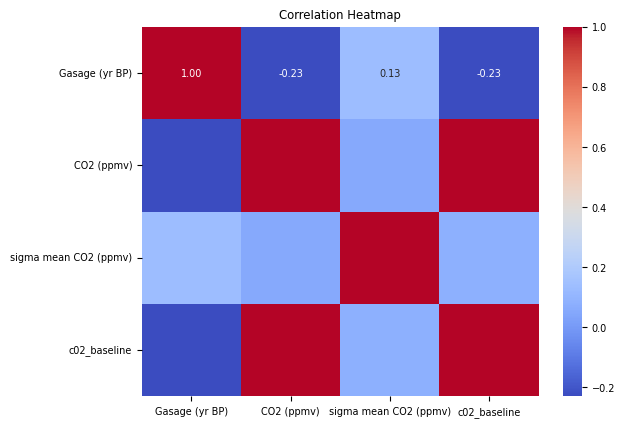

In [ ]:
# seaborn correlation_matrix

correlation_matrix = df_composite.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### - C02 - Box Plot

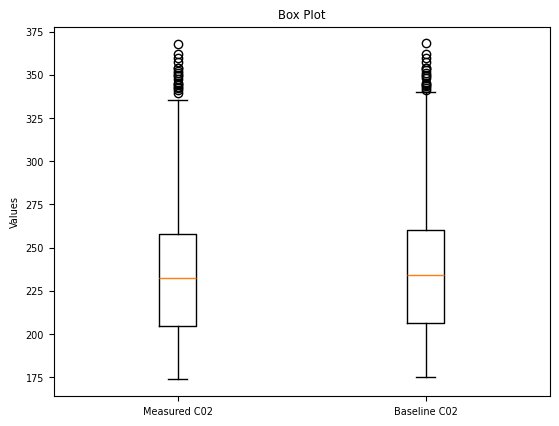

In [ ]:
plt.boxplot([df_composite['CO2 (ppmv)'], df_composite['c02_baseline']], labels=['Measured C02', 'Baseline C02'])
plt.ylabel('Values')
plt.title('Box Plot')
plt.show()

#### C02 Histogram

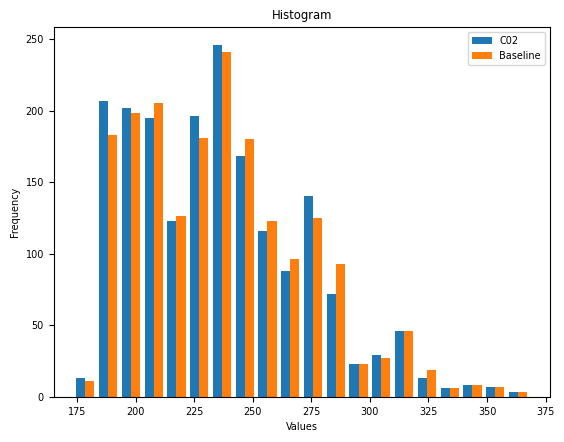

In [ ]:
plt.hist([df_composite['CO2 (ppmv)'], df_composite['c02_baseline']], bins=20, label=['C02', 'Baseline'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.legend()
plt.show()

#### C02 - scatter plot

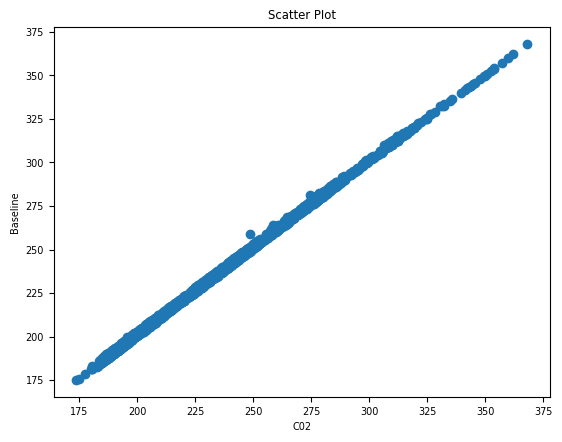

,Depth (m),"Gasage (EDC3, yr BP)","Gasage (AICC2012, yr BP)",CO2 (ppmv),sigma mean CO2 (ppmv),Depth (m).1,"Gasage (EDC3, yr BP).1","Gasage (AICC2012, yr BP).1",CO2 (ppmv).1,Depth (m).2,...,CO2 (ppmv).19,sigma mean CO2 (ppmv).16,Depth (m).19,"Gasage (AICC2012, yr BP).13",corrected CO2 (ppmv),analytical sigma mean CO2 (ppmv),Correcting Factor (ppmv),lower bound (2 sigma) of correction F. (ppmv),upper bound (2 sigma) of correction F. (ppmv),Unnamed: 108
0,102.83,137.0,350.11,280.4,1.8,149.1,2690.0,NaN,284.7,380.82,...,267.90,3.37,2950.53,562654.67,234.07,0.94,0.00,0.00,0.45,NaN
1,106.89,268.0,486.69,274.9,0.7,173.1,3897.0,3661.93,272.7,382.42,...,265.45,1.43,2951.82,563135.78,240.11,2.13,0.00,0.00,0.49,NaN
2,107.20,279.0,501.20,277.9,0.7,177.4,4124.0,3746.63,268.1,382.76,...,268.86,1.42,2952.92,563536.65,242.29,0.51,0.00,0.00,0.52,NaN
3,110.25,395.0,539.65,279.1,1.3,228.6,6735.0,6449.18,262.2,383.54,...,263.95,1.85,2954.02,563928.77,245.69,1.77,0.00,0.00,0.56,NaN
4,110.50,404.0,539.89,281.9,1.1,250.3,7873.0,7567.35,254.5,385.33,...,270.60,3.85,2955.12,564311.43,245.81,0.49,0.00,0.00,0.59,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3195.79,804522.67,204.86,1.64,9.87,7.56,12.17,NaN
390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3198.21,805132.44,202.23,0.69,10.01,7.64,12.37,NaN
391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3200.34,805668.87,207.29,2.20,10.14,7.71,12.55,NaN
392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
plt.scatter(df_composite['CO2 (ppmv)'], df_composite['c02_baseline'])
plt.xlabel('C02')
plt.ylabel('Baseline')
plt.title('Scatter Plot')
plt.show()
df

---
### Additional websites visited to learn more on weather and climate change.


**Met Éireann**

Website: https://www.met.ie/

Met Éireann, Ireland’s National Meteorological Service, is a line division of the Department of Housing, Local Government and Heritage and is the leading provider of weather information and related services in the State. I

&NewLine;  
&NewLine;  


**UK Met Office**

Website: https://www.metoffice.gov.uk/

UK Weather and climate change.

&NewLine;  
&NewLine;  


**Intergovernmental Panel on Climate Change (IPCC)**

Website: https://www.ipcc.ch/

The Intergovernmental Panel on Climate Change (IPCC) is the United Nations body for assessing the science related to climate change.

&NewLine;  
&NewLine;  


**National Aeronautics and Space Administration (NASA)**

Website: https://climate.nasa.gov/

To engage the world with accurate, accessible, and actionable information about our rapidly changing climate, from the global perspective of NASA.

&NewLine;  
&NewLine;  


**National Oceanic and Atmospheric Administration (NOAA)**

Website: https://www.climate.gov/

Americans’ health, security, and economic well-being are closely linked to climate and weather. People are looking for information to help them understand climate and make decisions on how to manage climate-related risks and opportunities. To meet this need, NOAA Climate.gov provides timely and authoritative scientific data and information about climate science, adaptation, and mitigation.

&NewLine;  
&NewLine;  


**European Centre for Medium-Range Weather Forecasts (ECMWF)**

Website: https://www.ecmwf.int/

ECMWF is the European Centre for Medium-Range Weather Forecasts.

&NewLine;  
&NewLine;  


**World Meteorological Organization (WMO)**

Website: https://wmo.int/

WMO is the United Nations system's authoritative voice on the state and behaviour of the Earth's atmosphere, its interaction with the land and oceans, the weather and climate it produces and the resulting distribution of water resources. 


&NewLine;  
&NewLine;  


**United Nations Framework Convention on Climate Change (UNFCCC)**

Website: https://unfccc.int/

The UNFCCC secretariat (UN Climate Change) is the United Nations entity tasked with supporting the global response to the threat of climate change.  UNFCCC stands for United Nations Framework Convention on Climate Change.


&NewLine;  
&NewLine;  


**Climate Action Tracker**

Website: https://climateactiontracker.org/

The Climate Action Tracker is an independent scientific project that tracks government climate action and measures it against the globally agreed Paris Agreement aim of "holding warming well below 2°C, and pursuing efforts to limit warming to 1.5°C." A collaboration of two organisations, Climate Analytics and NewClimate Institute, the CAT has been providing this independent analysis to policymakers since 2009.

***
## References Section
<a id="References"> </a>
<a id="references"> </a>




[Ref number] Author’s initials. Authors Surname. (Year, Month. Day). Title of web page [Online]. Available: URL

[1]

How to get rid of specific warning messages in python while keeping all other warnings as normal?


https://stackoverflow.com/questions/9134795/



[2] 

Type error unsupported type for timedelta days component datetime datetime.

https://stackoverflow.com/questions/11629552/typeerror-unsupported-type-for-timedelta-days-component-datetime-datetime


[3] 

Convert kelvin to celsius.

https://lindevs.com/convert-kelvin-to-celsius/


[4]

How can I remove extra whitespace from strings when parsing a csv file in pandas.

https://stackoverflow.com/questions/13385860/


[5]

towardsdatascience.com

Dealing with extra white spaces while reading csv in pandas.

https://towardsdatascience.com/dealing-with-extra-white-spaces-while-reading-csv-in-pandas-67b0c2b71e6a


[6]

UnicodeDecodeError: 'utf8' codec can't decode byte 0xa5 in position 0: invalid start byte

https://stackoverflow.com/questions/22216076/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-s


[7]

How to skip an unknown number of empty lines before header on pandas.read_csv?

https://stackoverflow.com/questions/39297878/how-to-skip-an-unknown-number-of-empty-lines-before-header-on-pandas-read-csv

[8]

Read csv file by column number in pandas python

https://stackoverflow.com/questions/61553063/read-csv-file-by-column-number-in-pandas-python

[9]

Renaming column names in Pandas

https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas

[10]

Codecademy.com - Can we add a new column at a specific position in a pandas dataframe.

https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842


[11]

Append csv files

https://www.usepandas.com/csv/append-csv-files


[12]


CP - The Antarctic ice core chronology (AICC2012): an optimized multi-parameter and multi-site dating approach for the last 120 thousand years

D. Veres, L. Bazin, A. Landais, H. Toyé Mahamadou Kele, B. Lemieux-Dudon, F. Parrenin, P. Martinerie, E. Blayo, T. Blunier, E. Capron, J. Chappellaz, S. O. Rasmussen, M. Severi, A. Svensson, B. Vinther, and E. W. Wolff

01 Aug 2013

https://cp.copernicus.org/articles/9/1733/2013/



[13]

Deuterium 

What controls deuterium excess in global precipitation?

S. Pfahl and H. Sodemann

22 Apr 2014

https://cp.copernicus.org/articles/10/771/2014/#:~:text=The%20deuterium%20excess%20%28d%29%20of%20precipitation%20is%20widely,directly%20be%20inferred%20from%20present-day%20water%20isotope%20observations.


[14]

Jean Jouzel

https://en.wikipedia.org/wiki/Jean_Jouzel

[15]

https://www.met.ie/met-eireann-warning-system-explained

Met Eireann's warning system of YELLOW, ORANGE and RED warnings explained.


[16]

dly1075.csv from https://data.gov.ie/dataset/roches-point-daily-data

This is the daily data for Roches Point.

I found it frustrating that Malin Head is said to be the windiest Met weather station in Ireland, yet that file only has the mean daily wind speed, and not the daily top 10 minute gusts (which can be much higher).

So therefore that misses the top ten minute gusts (usually recorded in column called 'tm').

This field of information isn't included in many of the Met.ie data files.


[17]

https://www.antarcticglaciers.org/glaciers-and-climate/ice-cores/ice-core-basics/

Ice core basics

Bethan Davies – Last updated 22/06/2020 tagged Climate change, ice core


[18]
https://cp.copernicus.org/articles/3/485/2007/cp-3-485-2007.pdf

The EDC3 chronology for the EPICA Dome C ice core

F. Parrenin1
, J.-M. Barnola1
, J. Beer2
, T. Blunier3
, E. Castellano4
, J. Chappellaz1
, G. Dreyfus5
, H. Fischer6
, S. Fujita7
,
J. Jouzel5
, K. Kawamura8
, B. Lemieux-Dudon1
, L. Loulergue1
, V. Masson-Delmotte5
, B. Narcisi9
, J.-R. Petit1
,
G. Raisbeck10, D. Raynaud1
, U. Ruth6
, J. Schwander3
, M. Severi4
, R. Spahni3
, J. P. Steffensen11, A. Svensson11
,
R. Udisti4
, C. Waelbroeck1
, and E. Wolff12


[19]
https://doi.pangaea.de/10.1594/PANGAEA.683655


Jouzel, Jean; Masson-Delmotte, Valerie (2007): EPICA Dome C Ice Core 800KYr deuterium data and temperature estimates. PANGAEA,https://doi.org/10.1594/PANGAEA.683655,

Supplement to: Jouzel, Jean; Masson-Delmotte, Valerie; Cattani, Olivier; Dreyfus, Gabrielle; Falourd, Sonia; Hoffmann, G; Minster, Bénédicte; Nouet, Julius; Barnola, Jean-Marc; Chappellaz, Jérôme A; Fischer, Hubertus; Gallet, J C; Johnsen, Sigfús Jóhann; Leuenberger, Markus Christian; Loulergue, Laetitia; Luethi, D; Oerter, Hans; Parrenin, Frédéric; Raisbeck, Grant M; Raynaud, Dominique; Schilt, Adrian; Schwander, Jakob; Selmo, Enricomaria; Souchez, Roland A; Spahni, Renato; Stauffer, Bernhard; Steffensen, Jørgen Peder; Stenni, Barbara; Stocker, Thomas F; Tison, Jean-Louis; Werner, Martin; Wolff, Eric William (2007): Orbital and millennial Antarctic climate variability over the past 800,000 years. Science, 317(5839), 793-797, https://doi.org/10.1126/science.1141038

[20]

<https://www.gov.ie/en/press-release/ea1f7-met-eireann-data-shows-2023-is-the-warmest-year-on-record-and-a-year-of-firsts-for-ireland/>

gov.ie, Keith Lambkin, Head of Climate Services at Met Éireann (28 December 2023)   

Met Éireann data shows 2023 is the warmest year on record and a year of firsts for Ireland






### End of References

***

## End